## === Research Zone ===

### 1. Import Libraries

In [1]:
from cdlib import algorithms, viz, readwrite
import copy
from ipycytoscape import CytoscapeWidget
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import v_measure_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter('ignore')

C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\LENOVO\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'karateclub', 'graph_tool', 'wurlitzer'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


### 2. Load Adjacency Matrix from Wang, Jiang, and Lin Method

In [2]:
df_wang = pd.read_excel('./../data/adjmatrix-Wang.xlsx')
df_jiang = pd.read_excel('./../data/adjmatrix-Jiang.xlsx')
df_lin = pd.read_excel('./../data/adjmatrix-Lin.xlsx')

### 3. Drop Row and Column with NAN Values

In [3]:
df_wang = df_wang.dropna(axis=0, thresh=3)
df_wang = df_wang.dropna(axis=1, thresh=3)
print(len(df_wang))

df_jiang = df_jiang.dropna(axis=0, thresh=3)
df_jiang = df_jiang.dropna(axis=1, thresh=3)
print(len(df_jiang))

df_lin = df_lin.dropna(axis=0, thresh=3)
df_lin = df_lin.dropna(axis=1, thresh=3)
print(len(df_lin))

845
845
845


### 4. Plot Wang, Jiang, and Lin Graphs' Edges Count

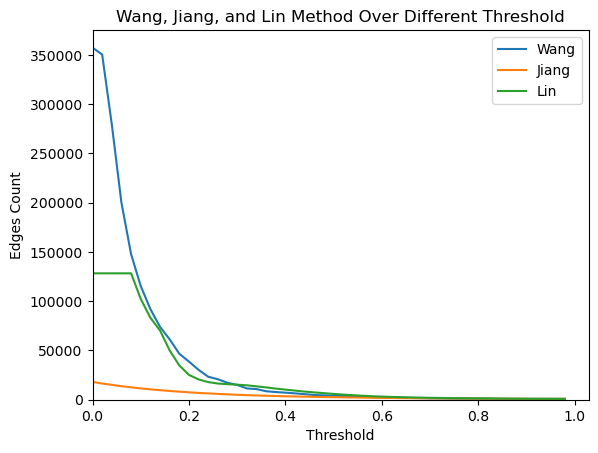

In [4]:
threshold_list = []
edges_list_wang = []
edges_list_jiang = []
edges_list_lin = []

for i in np.arange(0, 1, 0.02):
    k = copy.deepcopy(df_wang)
    k[k < i] = 0
    graph = nx.from_numpy_matrix(k.values)
    graph = nx.relabel_nodes(graph, dict(enumerate(k.columns)))
    edges = graph.number_of_edges()
    threshold_list.append(i)
    edges_list_wang.append(edges)
    
    k = copy.deepcopy(df_jiang)
    k[k < i] = 0
    graph = nx.from_numpy_matrix(k.values)
    graph = nx.relabel_nodes(graph, dict(enumerate(k.columns)))
    edges = graph.number_of_edges()
    edges_list_jiang.append(edges)
    
    k = copy.deepcopy(df_lin)
    k[k < i] = 0
    graph = nx.from_numpy_matrix(k.values)
    graph = nx.relabel_nodes(graph, dict(enumerate(k.columns)))
    edges = graph.number_of_edges()
    edges_list_lin.append(edges)

plt.title("Wang, Jiang, and Lin Method Over Different Threshold")
plt.plot(threshold_list, edges_list_wang)
plt.plot(threshold_list, edges_list_jiang)
plt.plot(threshold_list, edges_list_lin)
plt.xlim(0)
plt.ylim(0)
plt.xlabel("Threshold")
plt.ylabel("Edges Count")
plt.legend(['Wang', 'Jiang', 'Lin'])
plt.show()

### 5. Choose Wang Method with Threshold = 0.5, Make The Graph and See The Nodes Degree Distribution

Nodes that will be used as giant component: 323


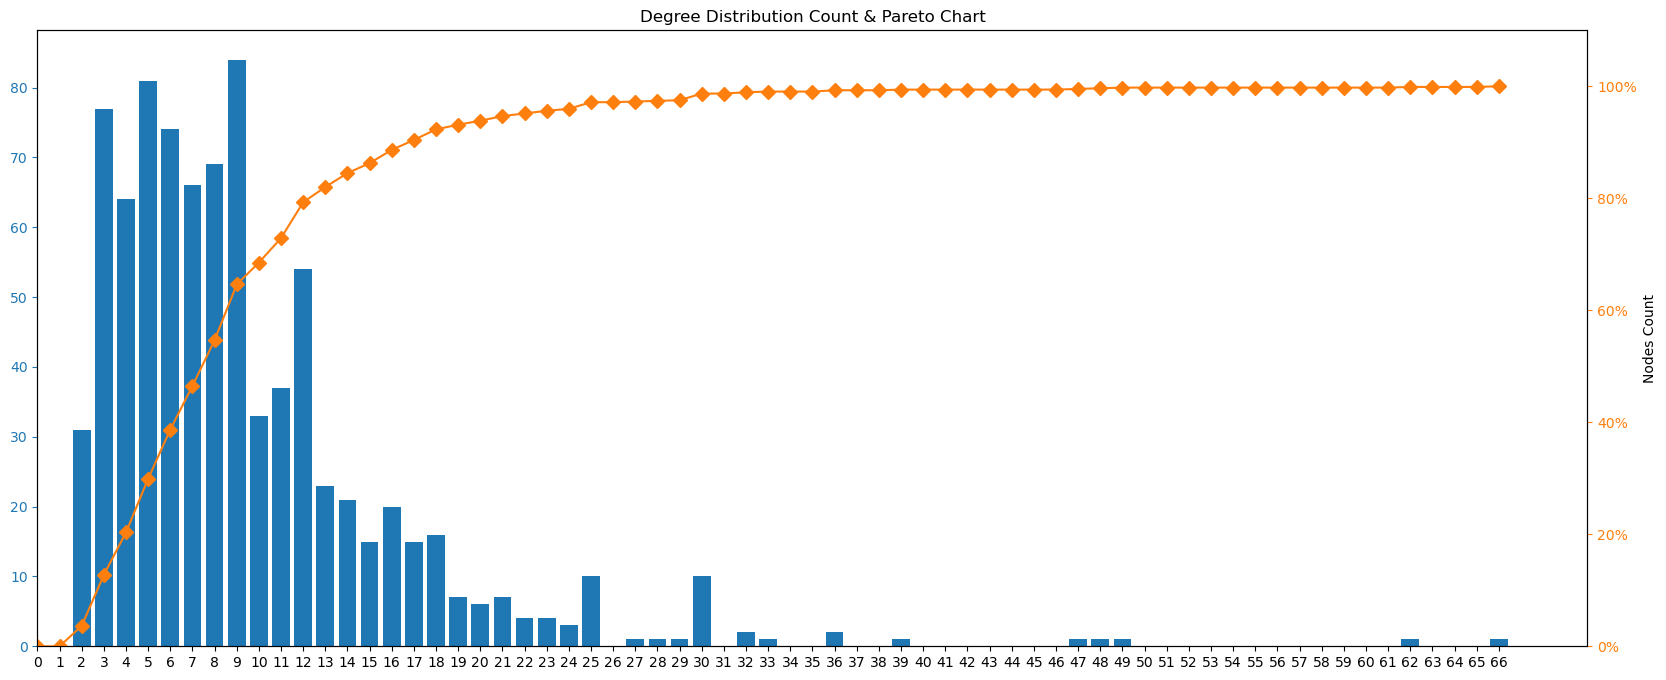

In [5]:
df_wang[df_wang < 0.5] = 0

graph = nx.from_numpy_matrix(df_wang.values)
graph = nx.relabel_nodes(graph, dict(enumerate(df_wang.columns)))

nx.write_edgelist(graph, "full_graph.edgelist", data=False)

nodes_of_largest_component  = max(nx.connected_components(graph), key = len)
print("Nodes that will be used as giant component: " + str(len(nodes_of_largest_component)))
g = graph.subgraph(nodes_of_largest_component)
nx.write_edgelist(g, "giant_subgraph.edgelist", data=False)
overall_density = nx.density(g)

degree = graph.degree()

degree_dic = {}
for nodes, deg in degree:
    if deg not in degree_dic:
        degree_dic[deg] = 1
    else:
        degree_dic[deg] += 1

for i in range(0, 67):
    if i not in degree_dic:
        degree_dic[i] = 0
k = sorted(degree_dic.items())
    
data = pd.DataFrame(k, columns =['Degree', 'Count'])
data["cumpercentage"] = data["Count"].cumsum()/data["Count"].sum()*100

fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(data["Degree"], data["Count"], color="C0")
ax2 = ax.twinx()
ax2.plot(data["Degree"], data["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.xlim(0, 70)
plt.ylim(0, 110)
plt.xlabel("Degree")
plt.ylabel("Nodes Count")
plt.title("Degree Distribution Count & Pareto Chart")
plt.xticks(range(0, 67))
plt.show()

### 6. Plot The Largest Component Beside The Rest of The Graph w/ Cytoscape Widget

In [6]:
# cyto = CytoscapeWidget()

# for node in g.nodes(data=True):
#     node[1]["classes"] = 'classRey'
    
# for s, t, data in g.edges(data=True):
#     g[s][t]['classes'] = 'classRey'
    
# cyto.graph.add_graph_from_networkx(graph)
# cyto.set_style(
#     [
#         {
#              'selector': 'node.classRey',
#              'style': {
#                  'background-color': 'green'
#              }
#         },
#         {
#              'selector': 'edge.classRey',
#              'style': {
#                  'line-color': '#A0FFA0'
#              }
#         }
#     ]
# )
# display(cyto)

### 7. Plot The Larget Component On Its Own w/ Cytoscape Widget

In [7]:
# cyto_largest = CytoscapeWidget()
# cyto_largest.graph.add_graph_from_networkx(g)
# cyto_largest.set_style(
#     [
#         {
#              'selector': 'node',
#              'style': {
#                  'background-color': 'green'
#              }
#         },
#         {
#              'selector': 'edge',
#              'style': {
#                  'line-color': '#A0FFA0'
#              }
#         }
#     ]
# )
# display(cyto_largest)

### 8. Initialize The Position of Graph and Get The Communities with All Algorithms

In [8]:
random_pos = nx.random_layout(g, seed=42)

coms_af = algorithms.async_fluid(g, k=7)
coms_bel = algorithms.belief(g)
coms_cpm = algorithms.cpm(g)
coms_cw = algorithms.chinesewhispers(nx.Graph(g))
coms_der = algorithms.der(g)
coms_ev = algorithms.eigenvector(g)
coms_em = algorithms.em(nx.Graph(g), k=10)
coms_ga = algorithms.ga(g)
coms_gn = algorithms.girvan_newman(g, level=5)
coms_gm = algorithms.greedy_modularity(g)
coms_kc = algorithms.kcut(nx.Graph(g), kmax=4)
coms_lp = algorithms.label_propagation(g)
coms_lei = algorithms.leiden(g)
coms_lou = algorithms.louvain(g)
coms_mc = algorithms.markov_clustering(nx.Graph(g))
coms_rber = algorithms.rber_pots(g)
coms_rbp = algorithms.rb_pots(g)
coms_sic = algorithms.significance_communities(g)
coms_sg = algorithms.spinglass(g)
coms_sc = algorithms.surprise_communities(g)
coms_wt = algorithms.walktrap(g)

readwrite.write_community_csv(coms_lei, "leiden-communities.csv", ",")
readwrite.write_community_csv(coms_sg, "spinglass-communities.csv", ",")
readwrite.write_community_csv(coms_rber, "rberpots-communities.csv", ",")
readwrite.write_community_csv(coms_rbp, "rbpots-communities.csv", ",")
readwrite.write_community_csv(coms_lou, "louvain-communities.csv", ",")
readwrite.write_community_csv(coms_wt, "walktrap-communities.csv", ",")
readwrite.write_community_csv(coms_gn, "girvannewman-communities.csv", ",")
readwrite.write_community_csv(coms_bel, "belief-communities.csv", ",")

### 9.a.1. Using Async Fluid as Community Algorithm - Network Cluster

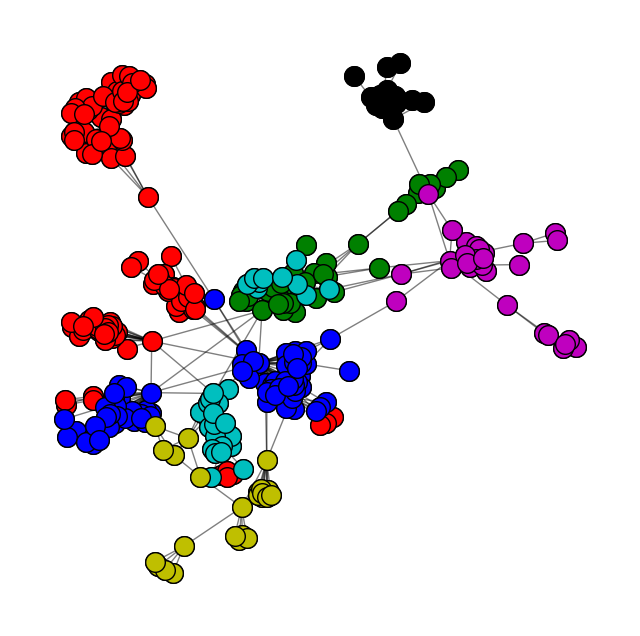

In [9]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_af, pos)

### 9.a.2. Plot the Community Graph

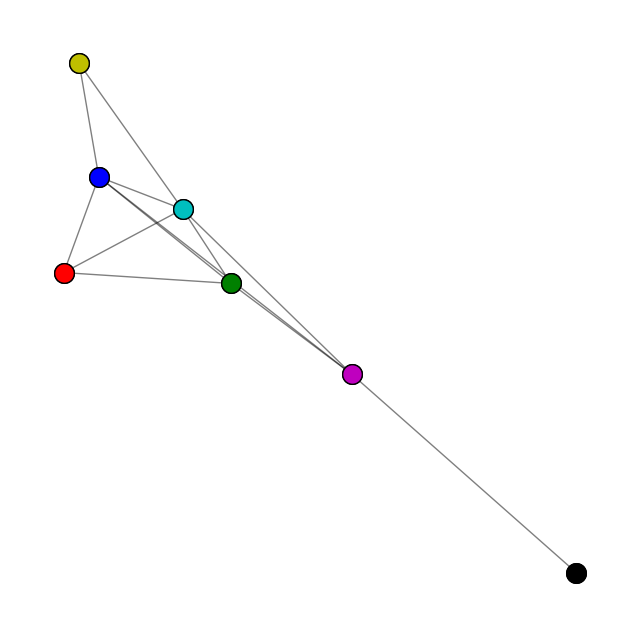

In [10]:
viz.plot_community_graph(g, coms_af)

### 9.a.3. Evaluate the Modularity

In [11]:
from cdlib import evaluation

algorithm = "async fluid"
m1 = evaluation.erdos_renyi_modularity(g, coms_af)
m2 = evaluation.link_modularity(g, coms_af)
m3 = evaluation.modularity_density(g, coms_af)
m4 = evaluation.newman_girvan_modularity(g, coms_af)
m5 = evaluation.z_modularity(g, coms_af)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

eval_table = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

0.7688563868748418
0.10593719120275327
54.87845154845155
0.7557309681419565
1.8647780762226875


### 9.b.1. Using Belief as Community Algorithm - Network Cluster

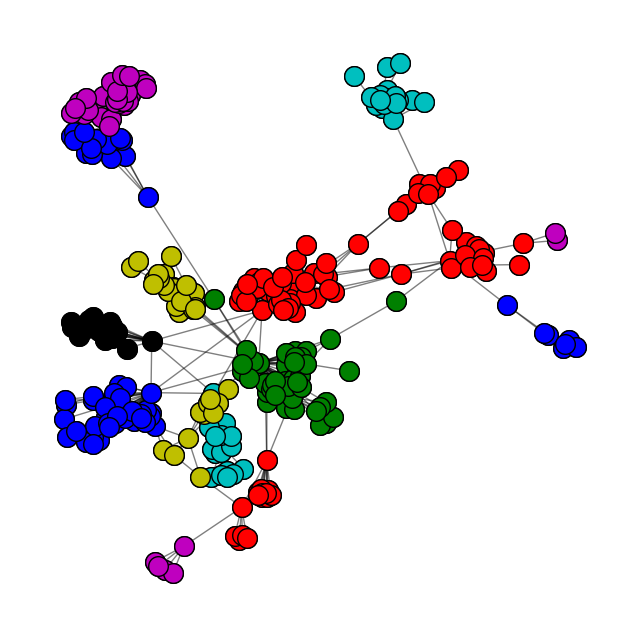

In [12]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_bel, pos)

### 9.b.2. Plot the Community Graph

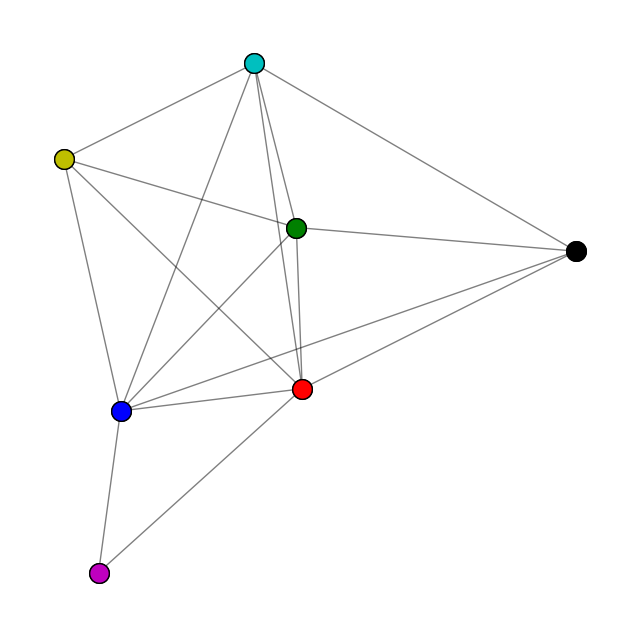

In [13]:
viz.plot_community_graph(g, coms_bel)

### 9.b.3. Evaluate the Modularity

In [14]:
algorithm = "belief"
m1 = evaluation.erdos_renyi_modularity(g, coms_bel)
m2 = evaluation.link_modularity(g, coms_bel)
m3 = evaluation.modularity_density(g, coms_bel)
m4 = evaluation.newman_girvan_modularity(g, coms_bel)
m5 = evaluation.z_modularity(g, coms_bel)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.8049494563970071
0.10676331082465874
58.819195516598555
0.8088433315450725
2.2076952941031016


### 9.c.1. Using CPM as Community Algorithm - Network Cluster

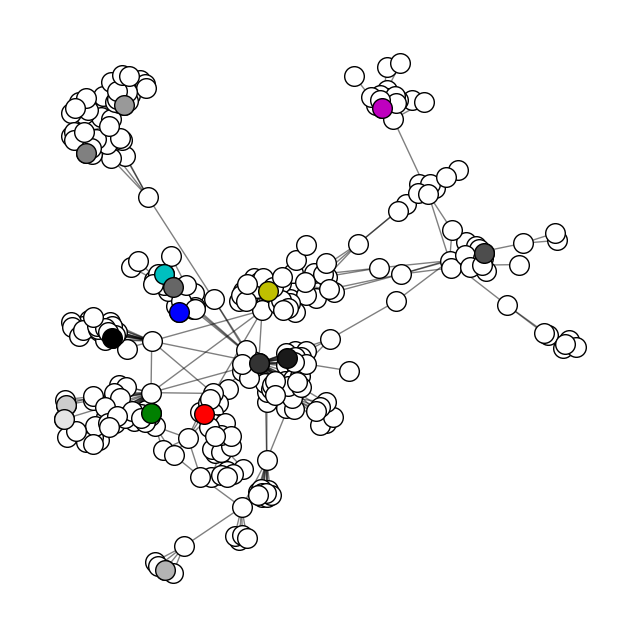

In [15]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_cpm, pos)

### 9.c.2. Plot the Community Graph

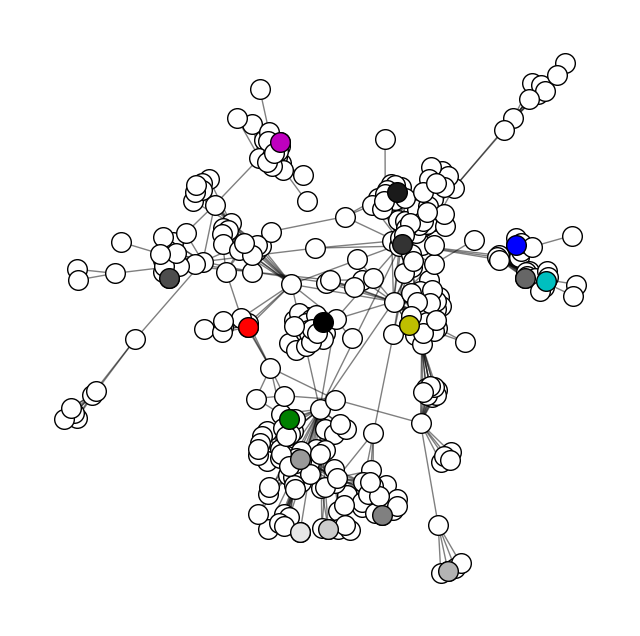

In [16]:
viz.plot_community_graph(g, coms_cpm)

### 9.c.3. Evaluate the Modularity

In [17]:
algorithm = "cpm"
m1 = evaluation.erdos_renyi_modularity(g, coms_cpm)
m2 = evaluation.link_modularity(g, coms_cpm)
m3 = evaluation.modularity_density(g, coms_cpm)
m4 = evaluation.newman_girvan_modularity(g, coms_cpm)
m5 = evaluation.z_modularity(g, coms_cpm)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.2305496074232691
0.0
-1510.0
0.22618620023119979
3.4316485879321283


### 9.d.1. Using Chinese Whispers as Community Algorithm - Network Cluster

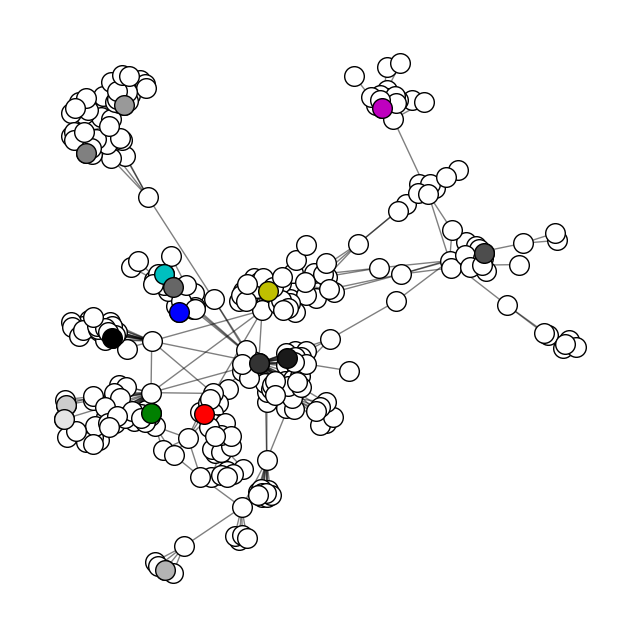

In [18]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_cw, pos)

### 9.d.2. Plot the Community Graph

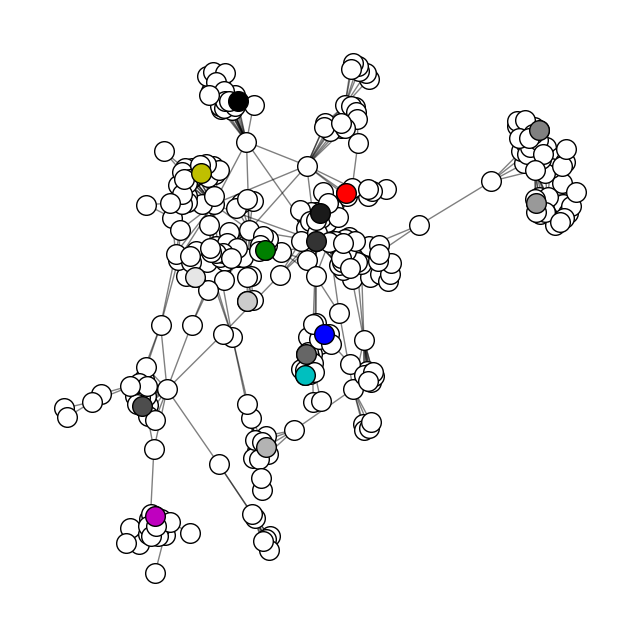

In [19]:
viz.plot_community_graph(g, coms_cw)

### 9.d.3. Evaluate the Modularity

In [20]:
algorithm = "chinese whispers"
m1 = evaluation.erdos_renyi_modularity(g, coms_cw)
m2 = evaluation.link_modularity(g, coms_cw)
m3 = evaluation.modularity_density(g, coms_cw)
m4 = evaluation.newman_girvan_modularity(g, coms_cw)
m5 = evaluation.z_modularity(g, coms_cw)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.2305496074232691
0.0
-1510.0
0.22618620023119979
3.4316485879321283


### 9.e.1. Using DER as Community Algorithm - Network Cluster

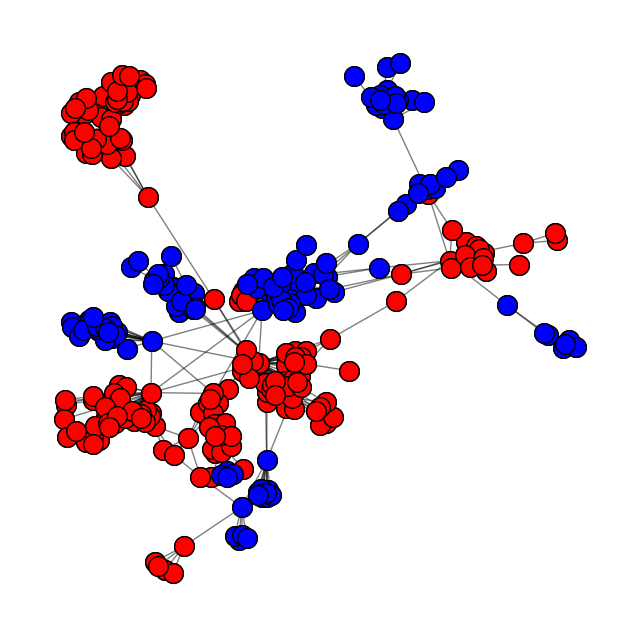

In [21]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_der, pos)

### 9.e.2. Plot the Community Graph

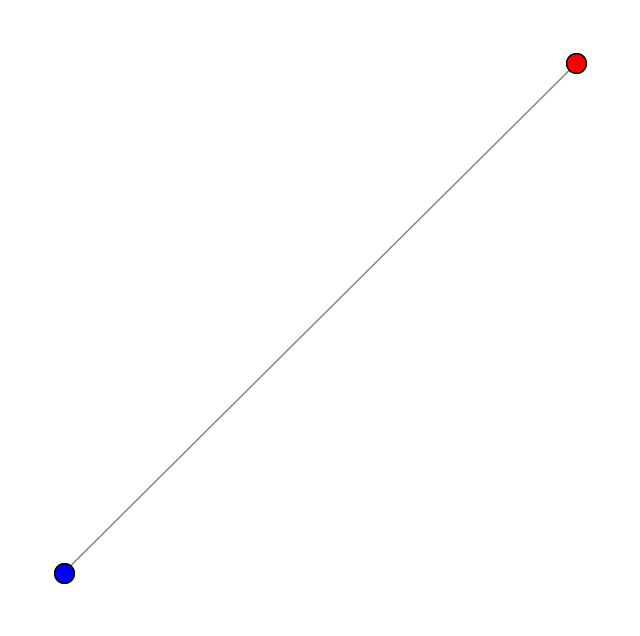

In [22]:
viz.plot_community_graph(g, coms_der)

### 9.e.3. Evaluate the Modularity

In [23]:
algorithm = "der"
m1 = evaluation.erdos_renyi_modularity(g, coms_der)
m2 = evaluation.link_modularity(g, coms_der)
m3 = evaluation.modularity_density(g, coms_der)
m4 = evaluation.newman_girvan_modularity(g, coms_der)
m5 = evaluation.z_modularity(g, coms_der)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.4670246403041345
0.10841515039801063
16.821448313985627
0.4740511136890598
0.9481696622731745


### 9.f.1. Using Eigenvector as Community Algorithm - Network Cluster

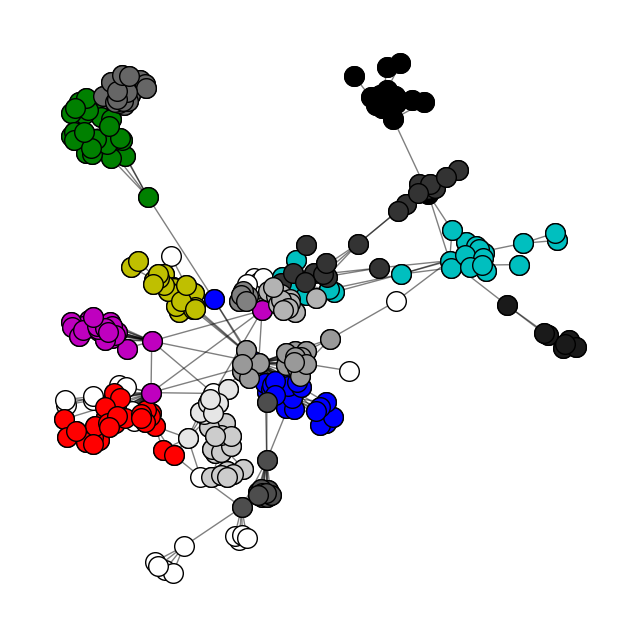

In [24]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_ev, pos)

### 9.f.2. Plot the Community Graph

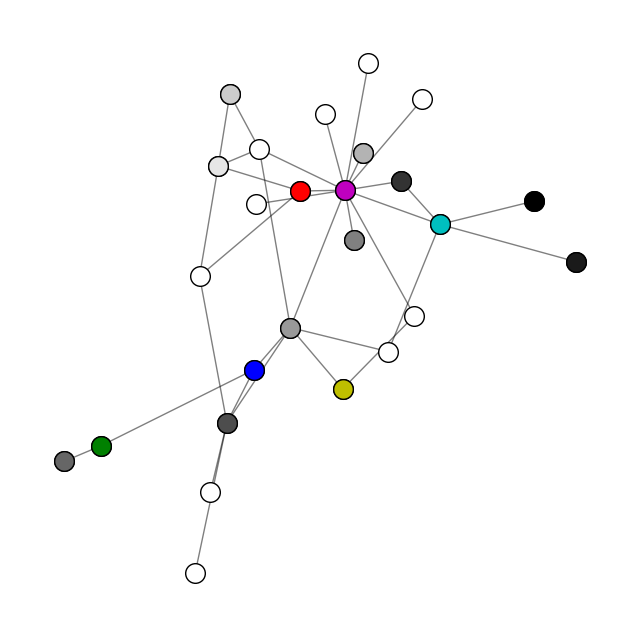

In [25]:
viz.plot_community_graph(g, coms_ev)

### 9.f.3. Evaluate the Modularity

In [26]:
algorithm = "eigenvector"
m1 = evaluation.erdos_renyi_modularity(g, coms_ev)
m2 = evaluation.link_modularity(g, coms_ev)
m3 = evaluation.modularity_density(g, coms_ev)
m4 = evaluation.newman_girvan_modularity(g, coms_ev)
m5 = evaluation.z_modularity(g, coms_ev)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.8397818371072672
0.09664501646886152
122.02863472784526
0.8291650554488206
3.2610074118889814


### 9.g.1. Using EM as Community Algorithm - Network Cluster

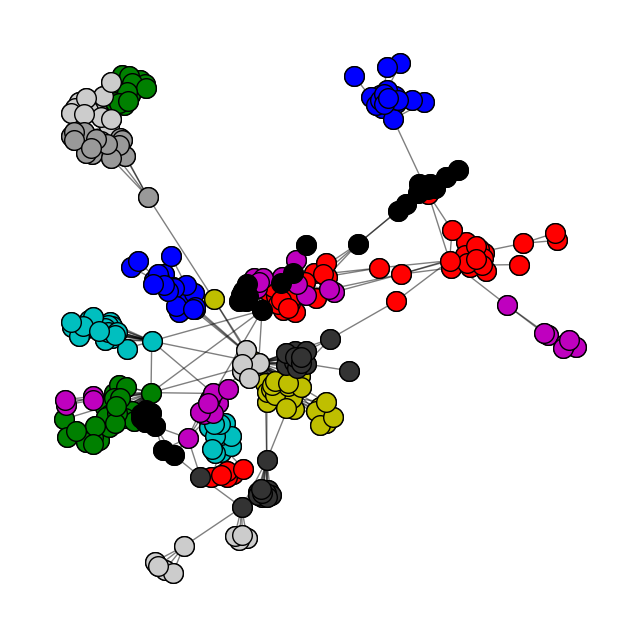

In [27]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_em, pos)

### 9.g.2. Plot the Community Graph

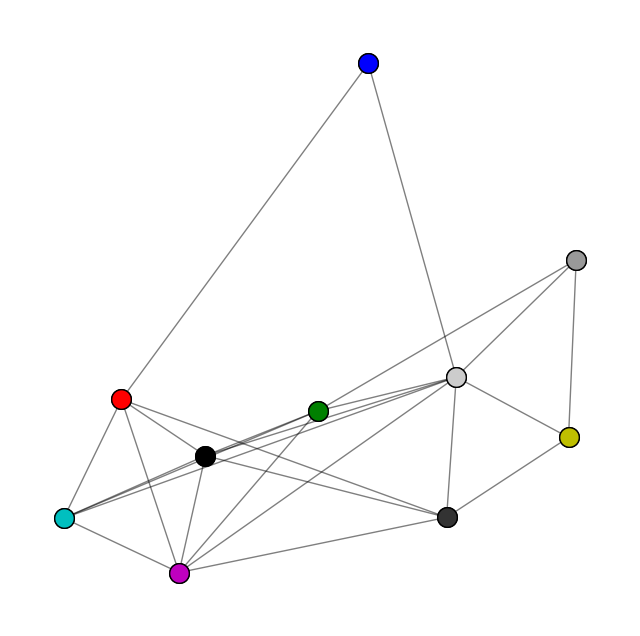

In [28]:
viz.plot_community_graph(g, coms_em)

### 9.g.3. Evaluate the Modularity

In [29]:
algorithm = "em"
m1 = evaluation.erdos_renyi_modularity(g, coms_em)
m2 = evaluation.link_modularity(g, coms_em)
m3 = evaluation.modularity_density(g, coms_em)
m4 = evaluation.newman_girvan_modularity(g, coms_em)
m5 = evaluation.z_modularity(g, coms_em)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.7864521569975312
0.09550925731912695
65.94720870457783
0.781105420264204
2.4995448788941865


### 9.h.1. Using GA as Community Algorithm - Network Cluster

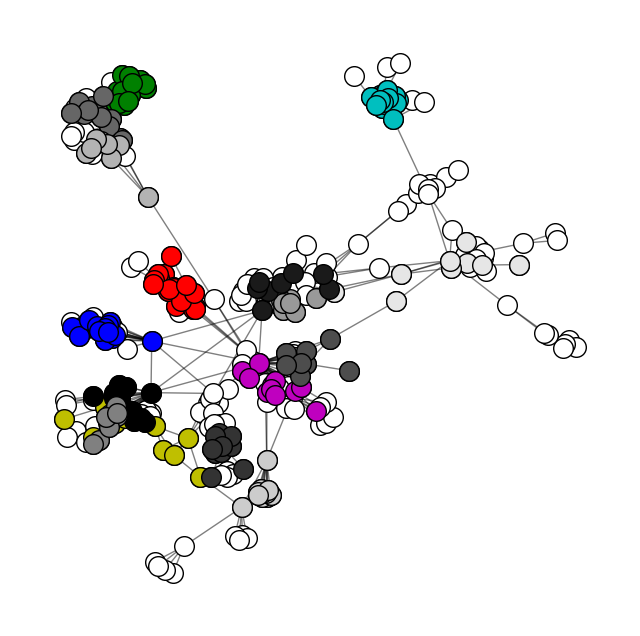

In [30]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_ga, pos)

### 9.h.2. Plot the Community Graph

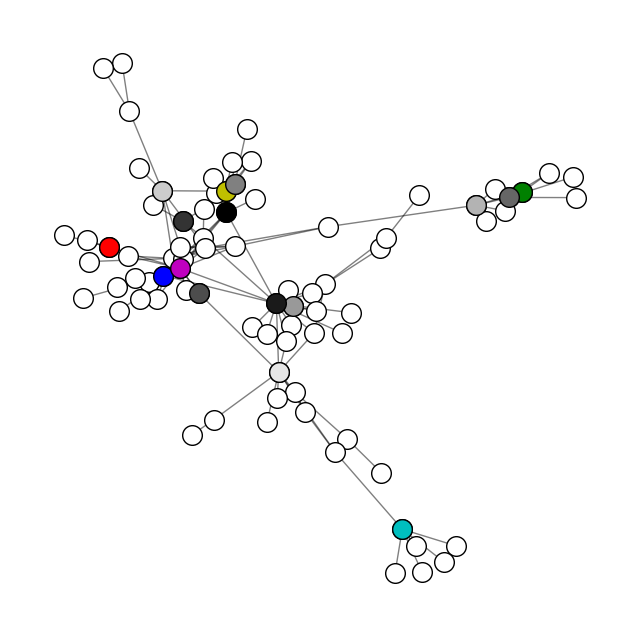

In [31]:
viz.plot_community_graph(g, coms_ga)

### 9.h.3. Evaluate the Modularity

In [32]:
algorithm = "ga"
m1 = evaluation.erdos_renyi_modularity(g, coms_ga)
m2 = evaluation.link_modularity(g, coms_ga)
m3 = evaluation.modularity_density(g, coms_ga)
m4 = evaluation.newman_girvan_modularity(g, coms_ga)
m5 = evaluation.z_modularity(g, coms_ga)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.6706591475814355
0.06711475908965547
68.32208853238265
0.6583512541515923
3.526820407201456


### 9.i.1. Using Girvan Newman as Community Algorithm - Network Cluster

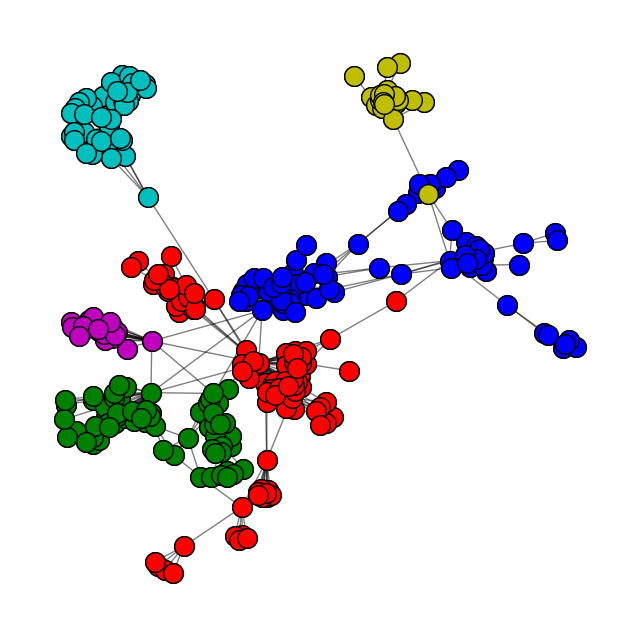

In [33]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_gn, pos)

### 9.i.2. Plot the Community Graph

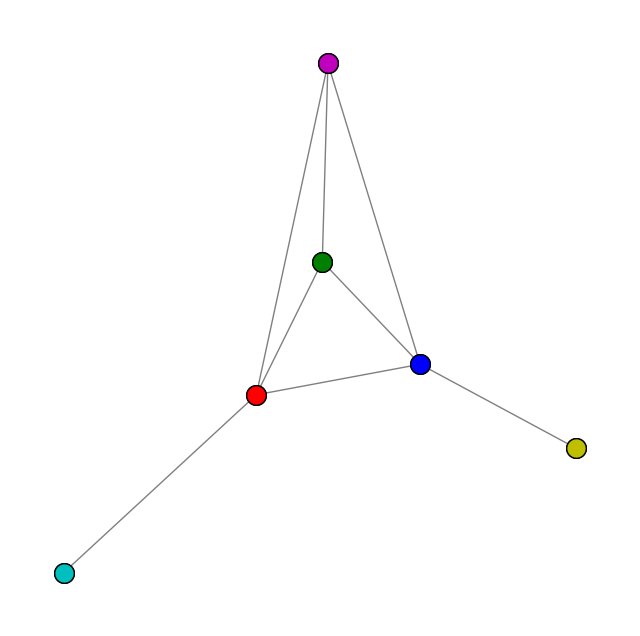

In [34]:
viz.plot_community_graph(g, coms_gn)

### 9.i.3. Evaluate the Modularity

In [35]:
algorithm = "girvan newman"
m1 = evaluation.erdos_renyi_modularity(g, coms_gn)
m2 = evaluation.link_modularity(g, coms_gn)
m3 = evaluation.modularity_density(g, coms_gn)
m4 = evaluation.newman_girvan_modularity(g, coms_gn)
m5 = evaluation.z_modularity(g, coms_gn)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.7848266674012643
0.10986069551772575
54.136951170455006
0.7891350167439287
1.9696240625506558


### 9.j.1. Using Greedy Modularity as Community Algorithm - Network Cluster

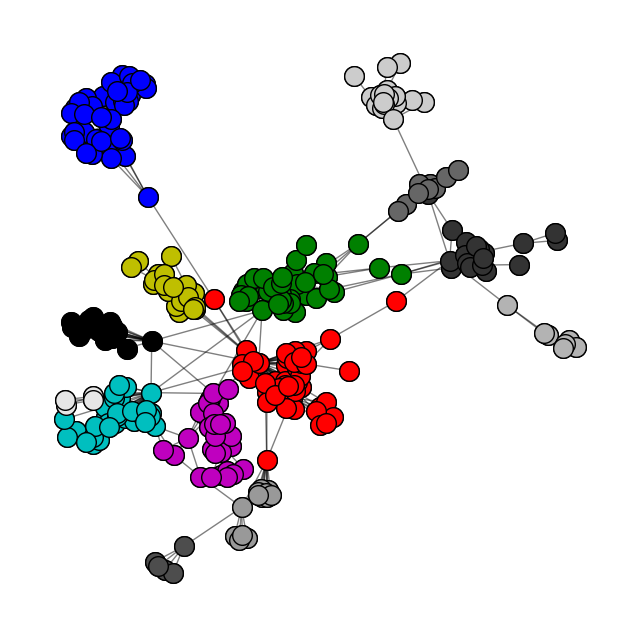

In [36]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_gm, pos)

### 9.j.2. Plot the Community Graph

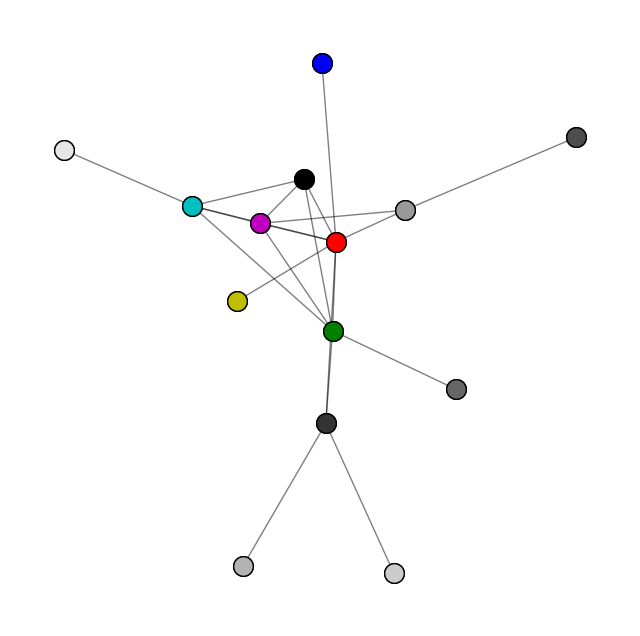

In [37]:
viz.plot_community_graph(g, coms_gm)

### 9.j.3. Evaluate the Modularity

In [38]:
algorithm = "greedy modularity"
m1 = evaluation.erdos_renyi_modularity(g, coms_gm)
m2 = evaluation.link_modularity(g, coms_gm)
m3 = evaluation.modularity_density(g, coms_gm)
m4 = evaluation.newman_girvan_modularity(g, coms_gm)
m5 = evaluation.z_modularity(g, coms_gm)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.8740507379996182
0.10717625189015945
106.1353735577178
0.867665647205193
2.844998987043929


### 9.k.1. Using KCut as Community Algorithm - Network Cluster

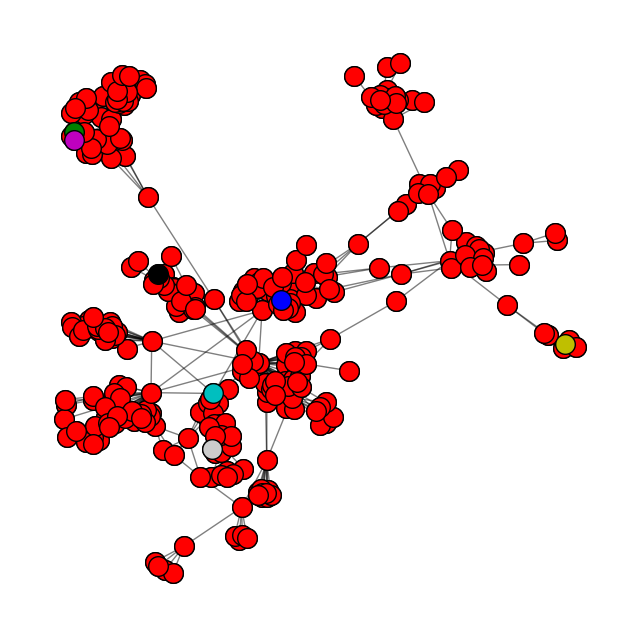

In [39]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_kc, pos)

### 9.k.2. Plot the Community Graph

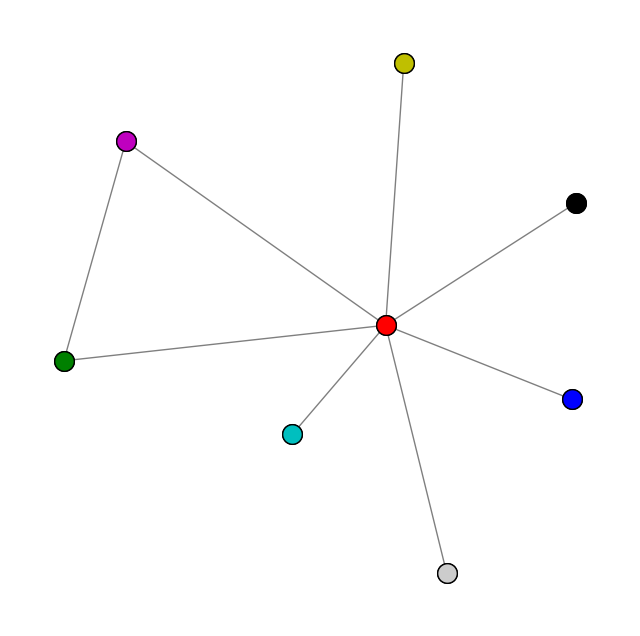

In [40]:
viz.plot_community_graph(g, coms_kc)

### 9.k.3. Evaluate the Modularity

In [41]:
algorithm = "kcut"
m1 = evaluation.erdos_renyi_modularity(g, coms_kc)
m2 = evaluation.link_modularity(g, coms_kc)
m3 = evaluation.modularity_density(g, coms_kc)
m4 = evaluation.newman_girvan_modularity(g, coms_kc)
m5 = evaluation.z_modularity(g, coms_kc)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.007964812550003421
0.10624642548722757
-27.639240506329116
0.010098833249015006
0.048677019166214544


### 9.l.1. Using Label Propagation as Community Algorithm - Network Cluster

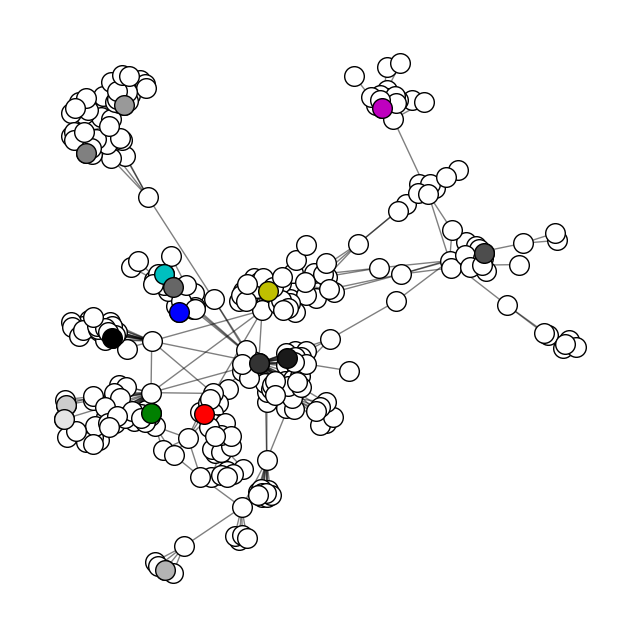

In [42]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_lp, pos)

### 9.l.2. Plot the Community Graph

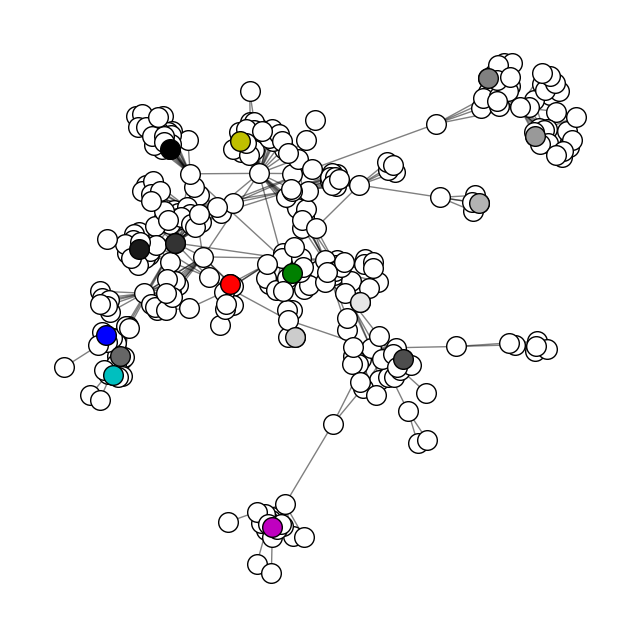

In [43]:
viz.plot_community_graph(g, coms_lp)

### 9.l.3. Evaluate the Modularity

In [44]:
algorithm = "label propagation"
m1 = evaluation.erdos_renyi_modularity(g, coms_lp)
m2 = evaluation.link_modularity(g, coms_lp)
m3 = evaluation.modularity_density(g, coms_lp)
m4 = evaluation.newman_girvan_modularity(g, coms_lp)
m5 = evaluation.z_modularity(g, coms_lp)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.2305496074232691
0.0
-1510.0
0.22618620023119979
3.4316485879321283


### 9.m.1. Using Leiden as Community Algorithm - Network Cluster

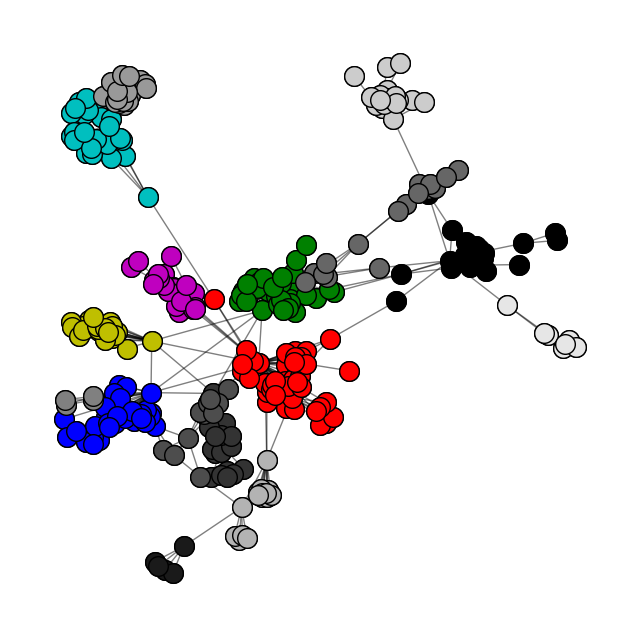

In [45]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_lei, pos)

### 9.m.2. Plot the Community Graph

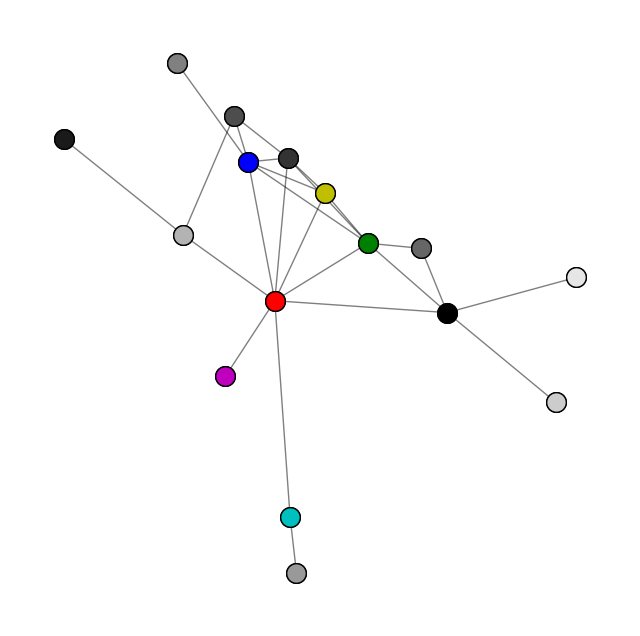

In [46]:
viz.plot_community_graph(g, coms_lei)

### 9.m.3. Evaluate the Modularity

In [47]:
algorithm = "leiden"
m1 = evaluation.erdos_renyi_modularity(g, coms_lei)
m2 = evaluation.link_modularity(g, coms_lei)
m3 = evaluation.modularity_density(g, coms_lei)
m4 = evaluation.newman_girvan_modularity(g, coms_lei)
m5 = evaluation.z_modularity(g, coms_lei)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.8853734526900885
0.10614383574133048
120.10330344258917
0.8774598138069016
3.1157895193227323


### 9.n.1. Using Louvain as Community Algorithm - Network Cluster

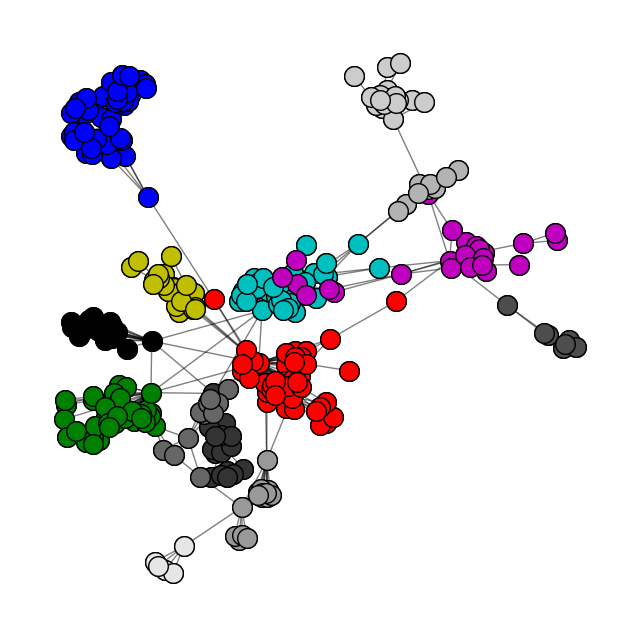

In [48]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_lou, pos)

### 9.n.2. Plot the Community Graph

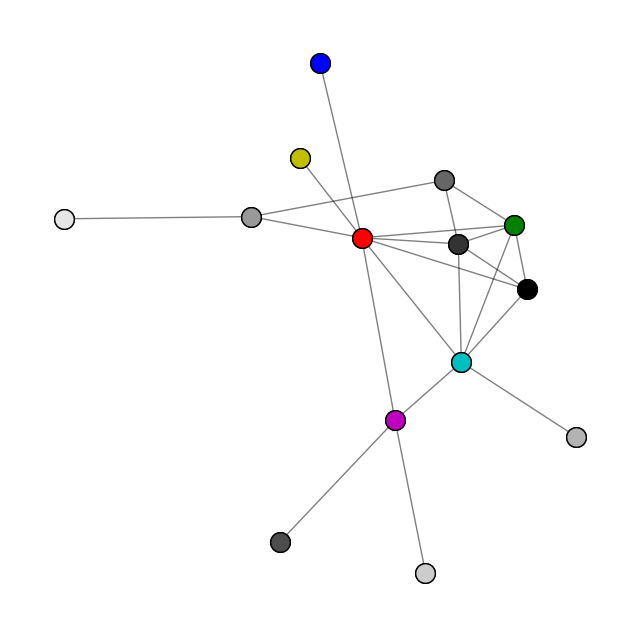

In [49]:
viz.plot_community_graph(g, coms_lou)

### 9.n.3. Evaluate the Modularity

In [50]:
algorithm = "louvain"
m1 = evaluation.erdos_renyi_modularity(g, coms_lou)
m2 = evaluation.link_modularity(g, coms_lou)
m3 = evaluation.modularity_density(g, coms_lou)
m4 = evaluation.newman_girvan_modularity(g, coms_lou)
m5 = evaluation.z_modularity(g, coms_lou)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.8805956577232
0.10748603182887172
108.71271160741748
0.8742582666301882
2.922891811100447


### 9.o.1. Using Markov Clustering as Community Algorithm - Network Cluster

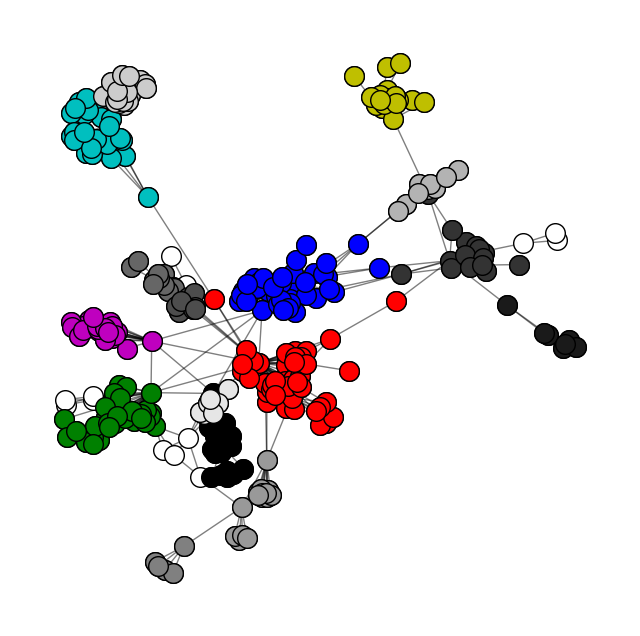

In [51]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_mc, pos)

### 9.o.2. Plot the Community Graph

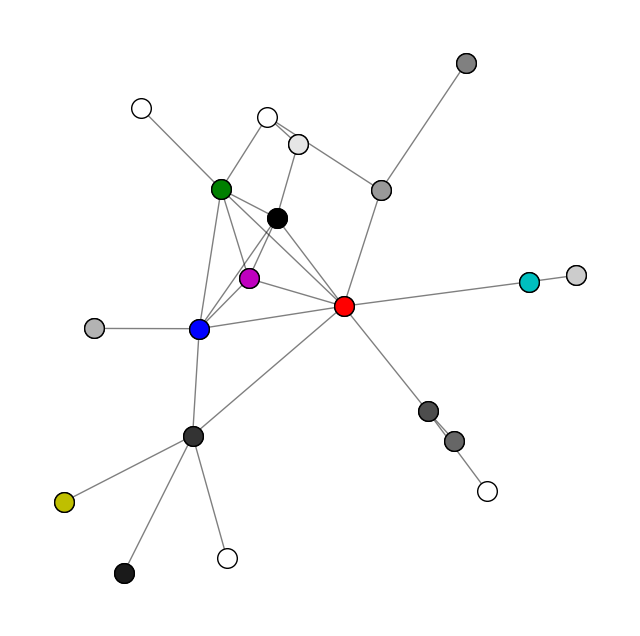

In [52]:
viz.plot_community_graph(g, coms_mc)

### 9.o.3. Evaluate the Modularity

In [53]:
algorithm = "markov clustering"
m1 = evaluation.erdos_renyi_modularity(g, coms_mc)
m2 = evaluation.link_modularity(g, coms_mc)
m3 = evaluation.modularity_density(g, coms_mc)
m4 = evaluation.newman_girvan_modularity(g, coms_mc)
m5 = evaluation.z_modularity(g, coms_mc)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.872157844953847
0.10418202955762207
129.98508785332314
0.8642687159829243
3.0748945072810585


### 9.p.1. Using RBer Pots as Community Algorithm - Network Cluster

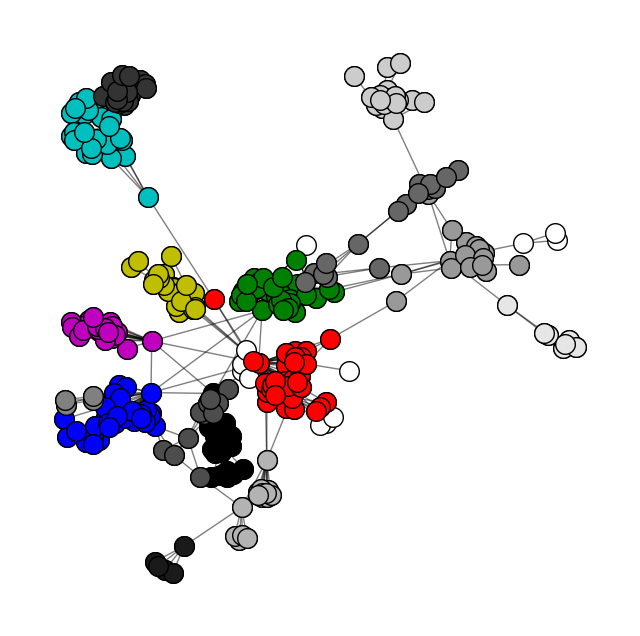

In [54]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_rber, pos)

### 9.p.2. Plot the Community Graph

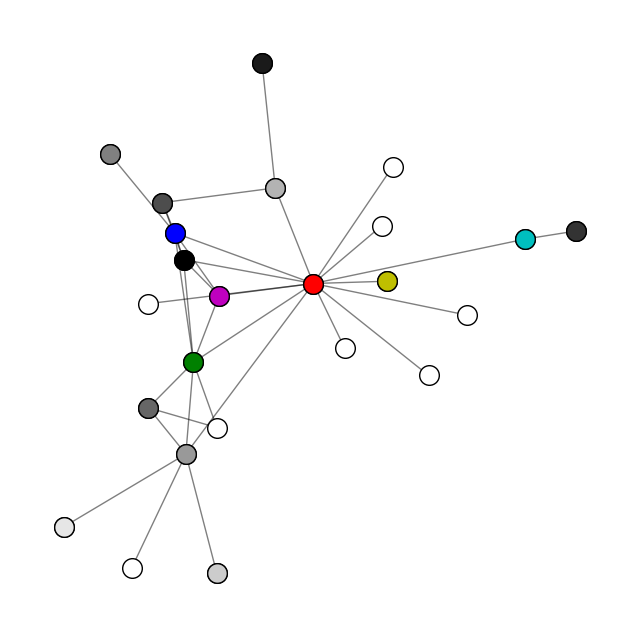

In [55]:
viz.plot_community_graph(g, coms_rber)

### 9.p.3. Evaluate the Modularity

In [56]:
algorithm = "rber pots"
m1 = evaluation.erdos_renyi_modularity(g, coms_rber)
m2 = evaluation.link_modularity(g, coms_rber)
m3 = evaluation.modularity_density(g, coms_rber)
m4 = evaluation.newman_girvan_modularity(g, coms_rber)
m5 = evaluation.z_modularity(g, coms_rber)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.8870982886659626
0.1050081135401165
134.5124406081723
0.8738957744570133
3.1752405631320713


### 9.q.1. Using RB Pots as Community Algorithm - Network Cluster

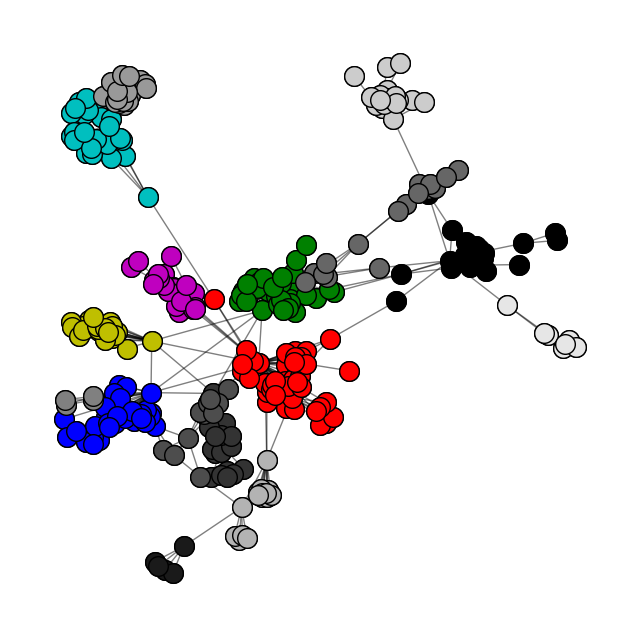

In [57]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_rbp, pos)

### 9.q.2. Plot the Community Graph

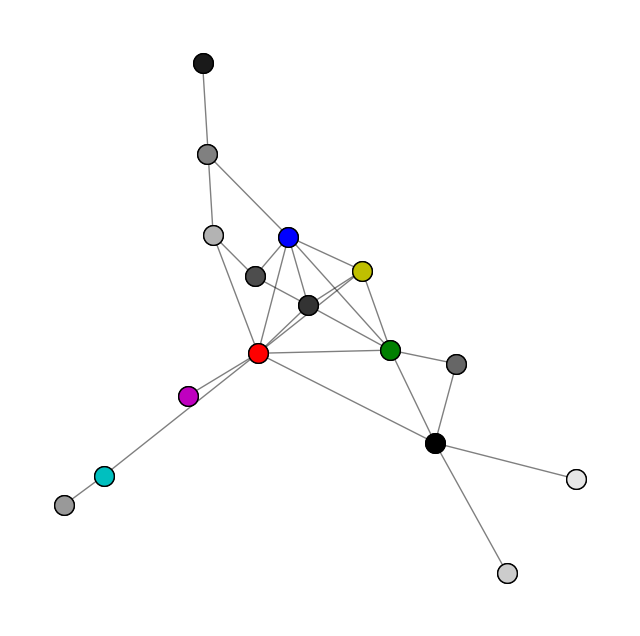

In [58]:
viz.plot_community_graph(g, coms_rbp)

### 9.q.3. Evaluate the Modularity

In [59]:
algorithm = "rb pots"
m1 = evaluation.erdos_renyi_modularity(g, coms_rbp)
m2 = evaluation.link_modularity(g, coms_rbp)
m3 = evaluation.modularity_density(g, coms_rbp)
m4 = evaluation.newman_girvan_modularity(g, coms_rbp)
m5 = evaluation.z_modularity(g, coms_rbp)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.8853734526900885
0.10614383574133048
120.10330344258917
0.8774598138069016
3.1157895193227323


### 9.r.1. Using Significance Communities as Community Algorithm - Network Cluster

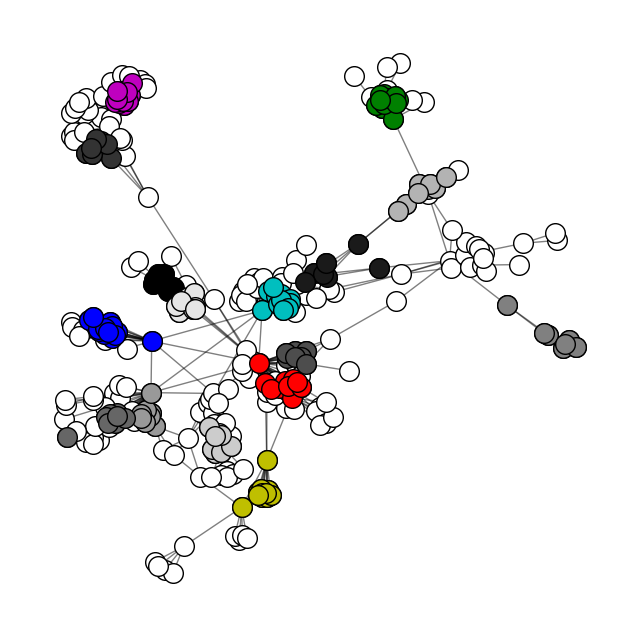

In [60]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_sic, pos)

### 9.r.2. Plot the Community Graph

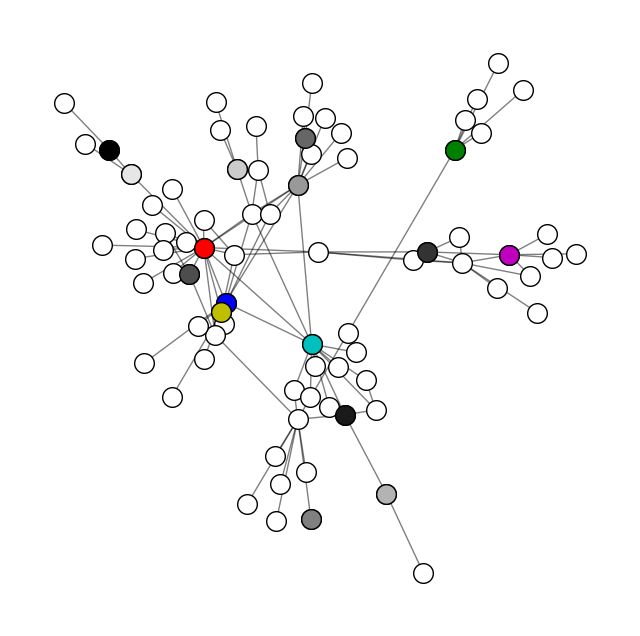

In [61]:
viz.plot_community_graph(g, coms_sic)

### 9.r.3. Evaluate the Modularity

In [62]:
algorithm = "significance communities"
m1 = evaluation.erdos_renyi_modularity(g, coms_sic)
m2 = evaluation.link_modularity(g, coms_sic)
m3 = evaluation.modularity_density(g, coms_sic)
m4 = evaluation.newman_girvan_modularity(g, coms_sic)
m5 = evaluation.z_modularity(g, coms_sic)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.7376589334473006
0.07599450025429445
191.29111999111998
0.7199331465594316
3.8668821552124224


### 9.s.1. Using Spinglass as Community Algorithm - Network Cluster

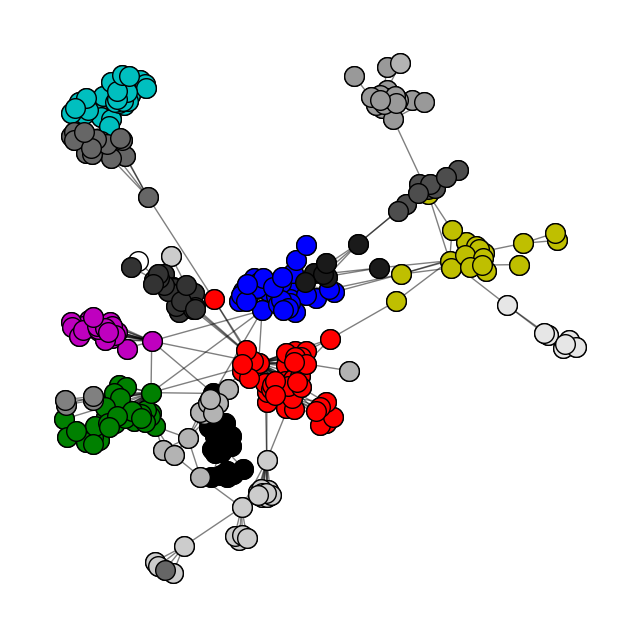

In [63]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_sg, pos)

### 9.s.2. Plot the Community Graph

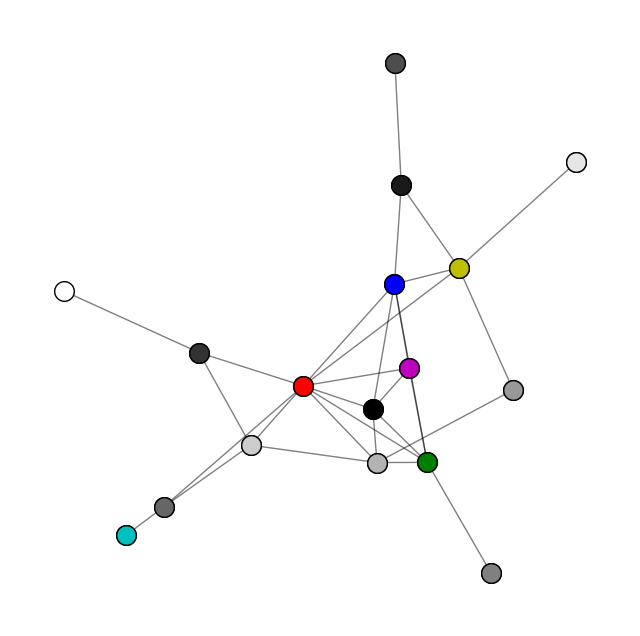

In [64]:
viz.plot_community_graph(g, coms_sg)

### 9.s.3. Evaluate the Modularity

In [65]:
algorithm = "spinglass"
m1 = evaluation.erdos_renyi_modularity(g, coms_sg)
m2 = evaluation.link_modularity(g, coms_sg)
m3 = evaluation.modularity_density(g, coms_sg)
m4 = evaluation.newman_girvan_modularity(g, coms_sg)
m5 = evaluation.z_modularity(g, coms_sg)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.8805478100471419
0.10531779306122271
119.59778985634249
0.8717511352398942
3.0955431064378454


### 9.t.1. Using Surprise Communities as Community Algorithm - Network Cluster

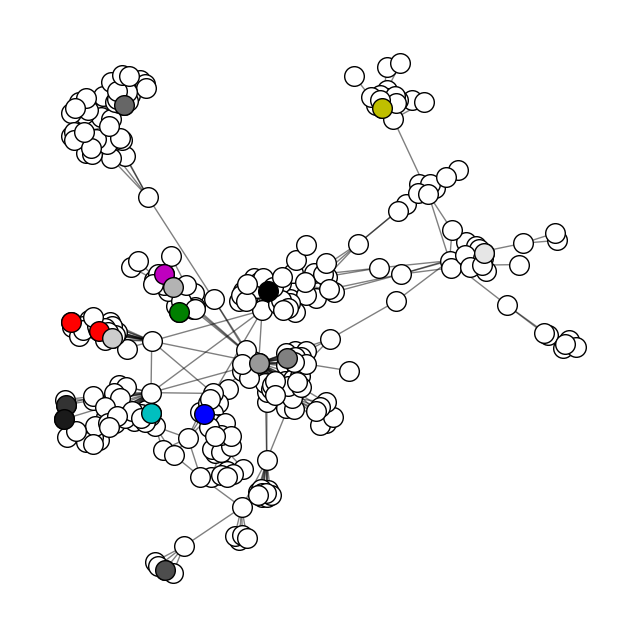

In [66]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_sc, pos)

### 9.t.2. Plot the Community Graph

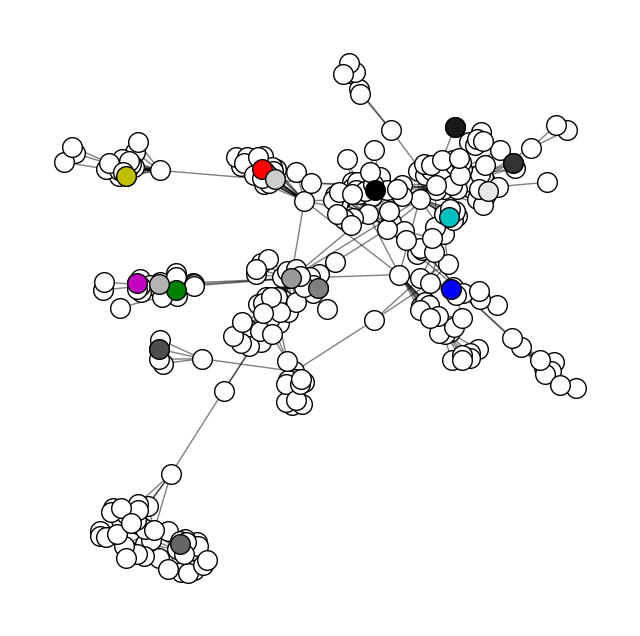

In [67]:
viz.plot_community_graph(g, coms_sc)

### 9.t.3. Evaluate the Modularity

In [68]:
algorithm = "surprise communities"
m1 = evaluation.erdos_renyi_modularity(g, coms_sc)
m2 = evaluation.link_modularity(g, coms_sc)
m3 = evaluation.modularity_density(g, coms_sc)
m4 = evaluation.newman_girvan_modularity(g, coms_sc)
m5 = evaluation.z_modularity(g, coms_sc)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.2312441536378172
0.00010325408164365229
-1498.5
0.226871954925639
3.4311017561604036


### 9.u.1. Using Walktrap as Community Algorithm - Network Cluster

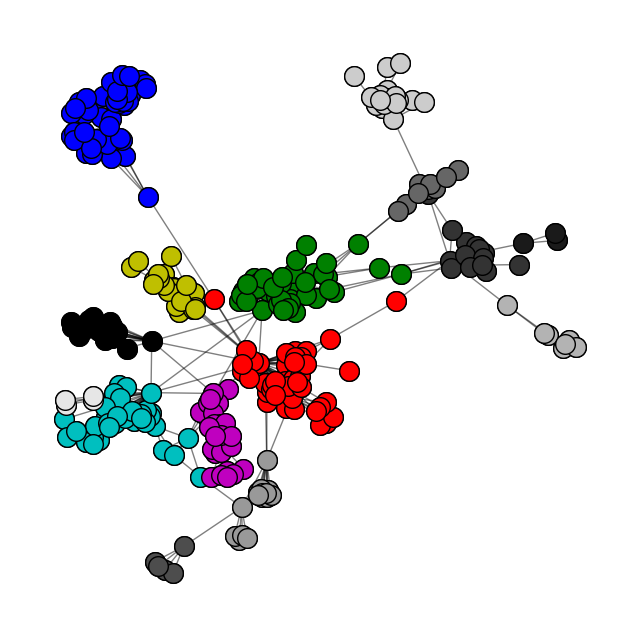

In [69]:
pos = nx.spring_layout(g, pos = random_pos)
viz.plot_network_clusters(g, coms_wt, pos)

### 9.u.2. Plot the Community Graph

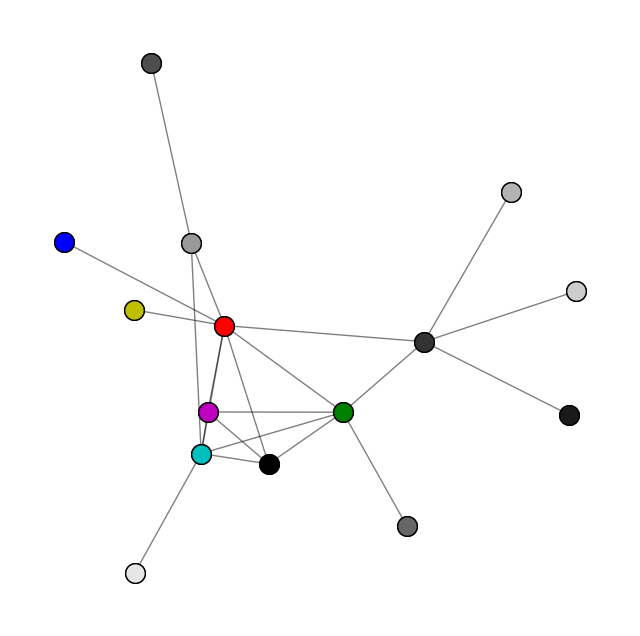

In [70]:
viz.plot_community_graph(g, coms_wt)

### 9.u.3. Evaluate the Modularity

In [71]:
algorithm = "walktrap"
m1 = evaluation.erdos_renyi_modularity(g, coms_wt)
m2 = evaluation.link_modularity(g, coms_wt)
m3 = evaluation.modularity_density(g, coms_wt)
m4 = evaluation.newman_girvan_modularity(g, coms_wt)
m5 = evaluation.z_modularity(g, coms_wt)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

temp = pd.DataFrame({"Algorithm":algorithm,
                         "Erdos Renyi Mod.": [m1.score], 
                         "Link Mod.": [m2.score],
                         "Mod. Density": [m3.score],
                         "Newman Girvan Mod.": [m4.score],
                         "Z Mod.": [m5.score]})

eval_table = eval_table.append(temp)

0.8794871728355098
0.10779577486964899
110.76993752859605
0.8729458564571754
2.874569055630773


### 10. Get the Result of Each Algorithm Modularity Score

In [72]:
eval_table

,Algorithm,Erdos Renyi Mod.,Link Mod.,Mod. Density,Newman Girvan Mod.,Z Mod.
0,async fluid,0.768856,0.105937,54.878452,0.755731,1.864778
0,belief,0.804949,0.106763,58.819196,0.808843,2.207695
0,cpm,0.230550,0.000000,-1510.000000,0.226186,3.431649
0,chinese whispers,0.230550,0.000000,-1510.000000,0.226186,3.431649
0,der,0.467025,0.108415,16.821448,0.474051,0.948170
0,eigenvector,0.839782,0.096645,122.028635,0.829165,3.261007
0,em,0.786452,0.095509,65.947209,0.781105,2.499545
0,ga,0.670659,0.067115,68.322089,0.658351,3.526820
0,girvan newman,0.784827,0.109861,54.136951,0.789135,1.969624
0,greedy modularity,0.874051,0.107176,106.135374,0.867666,2.844999


### 11. Standardize data, PCA them

In [73]:
df = eval_table.iloc[:, 1:6]

scaler = StandardScaler()
df = scaler.fit_transform(df)
pca = PCA(n_components=1, random_state=0, svd_solver='randomized')
model = pca.fit(df)
df = model.transform(df)
print(df)

[[-0.93538968]
 [-1.08404481]
 [ 3.57907966]
 [ 3.57907966]
 [ 0.03328705]
 [-1.04375388]
 [-0.85430683]
 [-0.02987301]
 [-1.06256005]
 [-1.31203699]
 [ 1.66115563]
 [ 3.57907966]
 [-1.33099898]
 [-1.33607522]
 [-1.27141983]
 [-1.32189472]
 [-1.33099898]
 [-0.44083997]
 [-1.30336041]
 [ 3.56610768]
 [-1.34023598]]


### 12. Get the Eigenvector

In [74]:
print(pca.components_)

[[-0.49600251 -0.49625634 -0.50703837 -0.49746022  0.05618339]]


### 13. Get the Eigenvalue

In [75]:
print(pca.explained_variance_)

[3.65046443]


### 14. Get the Top 5 Algorithms

In [76]:
eval_table_after_pca = pd.DataFrame(df)
eval_table_after_pca = eval_table.iloc[:, 0].reset_index().join(eval_table_after_pca).drop(columns=['index'])
eval_table_after_pca.sort_values(by=0, ascending=True)

,Algorithm,0
20,walktrap,-1.340236
13,louvain,-1.336075
16,rb pots,-1.330999
12,leiden,-1.330999
15,rber pots,-1.321895
9,greedy modularity,-1.312037
18,spinglass,-1.303360
14,markov clustering,-1.271420
1,belief,-1.084045
8,girvan newman,-1.062560


### 15.a. Centrality, Size, Edges Count, and Average Degree for Walktrap Algorithm

In [77]:
wt_com = pd.read_csv('walktrap-communities.csv', header=None)
wt_size = []
wt_edges = []
wt_sd = []

for i in range(len(wt_com)):
    doid_list = []
    doid_sign = []
    for j in wt_com.iloc[i]:
        if str(j) != 'nan':
            doid_list.append(j)
    k = copy.deepcopy(df_wang)
    doid_col_nums = []
    for doid in doid_list:
        doid_col_nums.append(k.columns.get_loc(doid))
    community_adj_mat = k[doid_list].iloc[doid_col_nums]
    com_graph = nx.from_numpy_matrix(community_adj_mat.values)
    com_graph = nx.relabel_nodes(com_graph, dict(enumerate(community_adj_mat.columns)))
    
    wt_size.append(("Walktrap", com_graph.number_of_nodes()))
    wt_edges.append(("Walktrap", com_graph.number_of_edges()))
    wt_sd.append(("Walktrap", nx.density(com_graph)/overall_density))
    
    bc = nx.betweenness_centrality(com_graph)
    dc = nx.degree_centrality(com_graph)
    cc = nx.closeness_centrality(com_graph)
    ev = nx.eigenvector_centrality(com_graph, 1000)

    print(i+1)
    max_keys_bc = [key for key, value in bc.items() if value == max(bc.values())]
    print(max_keys_bc)
    max_keys_dc = [key for key, value in dc.items() if value == max(dc.values())]
    print(max_keys_dc)
    max_keys_cc = [key for key, value in cc.items() if value == max(cc.values())]
    print(max_keys_cc)
    max_keys_ev = [key for key, value in ev.items() if value == max(ev.values())]
    print(max_keys_ev)
    print()

1
['DOID.863']
['DOID.863']
['DOID.863']
['DOID.863']

2
['DOID.150']
['DOID.150']
['DOID.150']
['DOID.0060037']

3
['DOID.77']
['DOID.77']
['DOID.77']
['DOID.77']

4
['DOID.1287']
['DOID.1287']
['DOID.1287']
['DOID.1287']

5
['DOID.0080001']
['DOID.0080001']
['DOID.0080001']
['DOID.0080001']

6
['DOID.8466']
['DOID.8466']
['DOID.0060260', 'DOID.790', 'DOID.8466', 'DOID.9335']
['DOID.8466']

7
['DOID.850', 'DOID.0050161']
['DOID.850', 'DOID.0050161']
['DOID.850', 'DOID.0050161']
['DOID.850', 'DOID.0050161']

8
['DOID.2723']
['DOID.2723']
['DOID.2723']
['DOID.2723']

9
['DOID.417']
['DOID.417']
['DOID.417']
['DOID.417']

10
['DOID.0050736']
['DOID.0050736']
['DOID.0050736']
['DOID.0050736']

11
['DOID.557']
['DOID.557']
['DOID.557']
['DOID.557']

12
['DOID.50']
['DOID.50']
['DOID.50']
['DOID.50']

13
['DOID.630']
['DOID.630']
['DOID.630']
['DOID.630']

14
['DOID.13094', 'DOID.1727', 'DOID.13098', 'DOID.8483']
['DOID.13094', 'DOID.1727', 'DOID.13098', 'DOID.8483']
['DOID.13094', 'DOID.17

Summary:

```
1.  DOID.863     -> nervous system disease
2.  DOID.150     -> disease of mental health
3.  DOID.77      -> gastrointestinal system disease
4.  DOID.1287    -> cardiovascular system disease
5.  DOID.0080001 -> bone disease
6.  DOID.8466    -> retinal degeneration
7.  DOID.850     -> lung disease
7.  DOID.0050161 -> lower respiratory tract disease
8.  DOID.2723    -> dermatitis
9.  DOID.417     -> autoimmune disease
10. DOID.0050736 -> autosomal dominant disease
11. DOID.557     -> kidney disease
12. DOID.50      -> thyroid gland disease
13. DOID.630     -> genetic disease
14. DOID.8483    -> retinal artery occlusion
14. DOID.1727    -> retinal vein occlusion
14. DOID.13098   -> central retinal artery occlusion
14. DOID.13094   -> branch retinal artery occlusion
15. DOID.612     -> primary immunodeficiency disease
```

### 15.b. Centrality, Size, Edges Count, and Average Degree for Leiden Algorithm

In [78]:
lei_com = pd.read_csv('leiden-communities.csv', header=None)
lei_size = []
lei_edges = []
lei_sd = []

for i in range(len(lei_com)):
    doid_list = []
    doid_sign = []
    for j in lei_com.iloc[i]:
        if str(j) != 'nan':
            doid_list.append(j)
    k = copy.deepcopy(df_wang)
    doid_col_nums = []
    for doid in doid_list:
        doid_col_nums.append(k.columns.get_loc(doid))
    community_adj_mat = k[doid_list].iloc[doid_col_nums]
    com_graph = nx.from_numpy_matrix(community_adj_mat.values)
    com_graph = nx.relabel_nodes(com_graph, dict(enumerate(community_adj_mat.columns)))
    
    lei_size.append(("Leiden", com_graph.number_of_nodes()))
    lei_edges.append(("Leiden", com_graph.number_of_edges()))
    lei_sd.append(("Leiden", nx.density(com_graph)/overall_density))
    
    bc = nx.betweenness_centrality(com_graph)
    dc = nx.degree_centrality(com_graph)
    cc = nx.closeness_centrality(com_graph)
    ev = nx.eigenvector_centrality(com_graph, 1000)
    
    print(i+1)
    max_keys_bc = [key for key, value in bc.items() if value == max(bc.values())]
    print(max_keys_bc)
    max_keys_dc = [key for key, value in dc.items() if value == max(dc.values())]
    print(max_keys_dc)
    max_keys_cc = [key for key, value in cc.items() if value == max(cc.values())]
    print(max_keys_cc)
    max_keys_ev = [key for key, value in ev.items() if value == max(ev.values())]
    print(max_keys_ev)
    print()

1
['DOID.863']
['DOID.863']
['DOID.863']
['DOID.863']

2
['DOID.1287']
['DOID.1287']
['DOID.1287']
['DOID.1287']

3
['DOID.77']
['DOID.77']
['DOID.77']
['DOID.77']

4
['DOID.150']
['DOID.1561', 'DOID.150']
['DOID.1561', 'DOID.150']
['DOID.1561']

5
['DOID.8466']
['DOID.8466']
['DOID.0060260', 'DOID.790', 'DOID.8466', 'DOID.9335']
['DOID.8466']

6
['DOID.850', 'DOID.0050161']
['DOID.850', 'DOID.0050161']
['DOID.850', 'DOID.0050161']
['DOID.850', 'DOID.0050161']

7
['DOID.0060056']
['DOID.417']
['DOID.417', 'DOID.0060056']
['DOID.417']

8
['DOID.2723']
['DOID.2723']
['DOID.2723']
['DOID.2723']

9
['DOID.0080001']
['DOID.0080001']
['DOID.0080001']
['DOID.0080001']

10
['DOID.0060037']
['DOID.0060037']
['DOID.0060037']
['DOID.0060037']

11
['DOID.11823']
['DOID.557']
['DOID.3021']
['DOID.557']

12
['DOID.0050736']
['DOID.0050736']
['DOID.0050736']
['DOID.0050736']

13
['DOID.0050700']
['DOID.633']
['DOID.633']
['DOID.633']

14
['DOID.50']
['DOID.50']
['DOID.50']
['DOID.50']

15
['DOID.630'

Summary:

```
1.  DOID.863     -> nervous system disease
2.  DOID.77      -> gastrointestinal system disease
3.  DOID.1287    -> cardiovascular system disease
4.  DOID.150     -> disease of mental health
4.  DOID.1561    -> cognitive disorder
5.  DOID.8466    -> retinal degeneration
6.  DOID.850     -> lung disease
6.  DOID.0050161 -> lower respiratory tract disease
7.  DOID.417     -> autoimmune disease
8.  DOID.0080001 -> bone disease
9.  DOID.2723    -> dermatitis
10. DOID.0060037 -> developmental disorder of mental health
11. DOID.557     -> kidney disease
12. DOID.0050736 -> autosomal dominant disease
13. DOID.633     -> myositis
14. DOID.50      -> thyroid gland disease
15. DOID.630     -> genetic disease
16. DOID.8483    -> retinal artery occlusion
16. DOID.1727    -> retinal vein occlusion
16. DOID.13098   -> central retinal artery occlusion
16. DOID.13094   -> branch retinal artery occlusion
```

### 15.c. Centrality, Size, Edges Count, and Average Degree for Louvain Algorithm

In [79]:
lou_com = pd.read_csv('louvain-communities.csv', header=None)
lou_size = []
lou_edges = []
lou_sd = []

for i in range(len(lou_com)):
    doid_list = []
    doid_sign = []
    for j in lou_com.iloc[i]:
        if str(j) != 'nan':
            doid_list.append(j)
    k = copy.deepcopy(df_wang)
    doid_col_nums = []
    for doid in doid_list:
        doid_col_nums.append(k.columns.get_loc(doid))
    community_adj_mat = k[doid_list].iloc[doid_col_nums]
    com_graph = nx.from_numpy_matrix(community_adj_mat.values)
    com_graph = nx.relabel_nodes(com_graph, dict(enumerate(community_adj_mat.columns)))
    
    lou_size.append(("Louvain", com_graph.number_of_nodes()))
    lou_edges.append(("Louvain", com_graph.number_of_edges()))
    lou_sd.append(("Louvain", nx.density(com_graph)/overall_density))
    
    bc = nx.betweenness_centrality(com_graph)
    dc = nx.degree_centrality(com_graph)
    cc = nx.closeness_centrality(com_graph)
    ev = nx.eigenvector_centrality(com_graph, 1000)

    print(i+1)
    max_keys_bc = [key for key, value in bc.items() if value == max(bc.values())]
    print(max_keys_bc)
    max_keys_dc = [key for key, value in dc.items() if value == max(dc.values())]
    print(max_keys_dc)
    max_keys_cc = [key for key, value in cc.items() if value == max(cc.values())]
    print(max_keys_cc)
    max_keys_ev = [key for key, value in ev.items() if value == max(ev.values())]
    print(max_keys_ev)
    print()

1
['DOID.863']
['DOID.863']
['DOID.863']
['DOID.863']

2
['DOID.150']
['DOID.150']
['DOID.150']
['DOID.0060037']

3
['DOID.1287']
['DOID.1287']
['DOID.1287']
['DOID.1287']

4
['DOID.77']
['DOID.77']
['DOID.77']
['DOID.77']

5
['DOID.0060056']
['DOID.417']
['DOID.0060056']
['DOID.417']

6
['DOID.8466']
['DOID.8466']
['DOID.0060260', 'DOID.790', 'DOID.8466', 'DOID.9335']
['DOID.8466']

7
['DOID.850', 'DOID.0050161']
['DOID.850', 'DOID.0050161']
['DOID.850', 'DOID.0050161']
['DOID.850', 'DOID.0050161']

8
['DOID.2723']
['DOID.2723']
['DOID.2723']
['DOID.2723']

9
['DOID.0080001']
['DOID.0080001']
['DOID.0080001']
['DOID.0080001']

10
['DOID.0050736']
['DOID.0050736']
['DOID.0050736']
['DOID.0050736']

11
['DOID.0050700']
['DOID.633']
['DOID.633']
['DOID.633']

12
['DOID.557']
['DOID.557']
['DOID.557']
['DOID.557']

13
['DOID.50']
['DOID.50']
['DOID.50']
['DOID.50']

14
['DOID.630']
['DOID.630']
['DOID.630']
['DOID.630']



Summary:

```
1.  DOID.863     -> nervous system disease
2.  DOID.77      -> gastrointestinal system disease
3.  DOID.1287    -> cardiovascular system disease
4.  DOID.150     -> disease of mental health
4.  DOID.1561    -> cognitive disorder
5.  DOID.0060056 -> hypersensitivity reaction disease
5.  DOID.417     -> autoimmune disease
6.  DOID.8466    -> retinal degeneration
7.  DOID.850     -> lung disease
7.  DOID.0050161 -> lower respiratory tract disease
8.  DOID.0080001 -> bone disease
9.  DOID.2723    -> dermatitis
10. DOID.0060037 -> developmental disorder of mental health
11. DOID.0050736 -> autosomal dominant disease
12. DOID.633     -> myositis
13. DOID.557     -> kidney disease
14. DOID.50      -> thyroid gland disease
15. DOID.630     -> genetic disease
16. DOID.8483    -> retinal artery occlusion
16. DOID.1727    -> retinal vein occlusion
16. DOID.13098   -> central retinal artery occlusion
16. DOID.13094   -> branch retinal artery occlusion
```

### 15.d. Centrality, Size, Edges Count, and Average Degree for RB Pots Algorithm

In [80]:
rbp_com = pd.read_csv('rbpots-communities.csv', header=None)
rbp_size = []
rbp_edges = []
rbp_sd = []

for i in range(len(rbp_com)):
    doid_list = []
    doid_sign = []
    for j in rbp_com.iloc[i]:
        if str(j) != 'nan':
            doid_list.append(j)
    k = copy.deepcopy(df_wang)
    doid_col_nums = []
    for doid in doid_list:
        doid_col_nums.append(k.columns.get_loc(doid))
    community_adj_mat = k[doid_list].iloc[doid_col_nums]
    com_graph = nx.from_numpy_matrix(community_adj_mat.values)
    com_graph = nx.relabel_nodes(com_graph, dict(enumerate(community_adj_mat.columns)))
    
    rbp_size.append(("RB Pots", com_graph.number_of_nodes()))
    rbp_edges.append(("RB Pots", com_graph.number_of_edges()))
    rbp_sd.append(("RB Pots", nx.density(com_graph)/overall_density))
    
    bc = nx.betweenness_centrality(com_graph)
    dc = nx.degree_centrality(com_graph)
    cc = nx.closeness_centrality(com_graph)
    ev = nx.eigenvector_centrality(com_graph, 1000)

    print(i+1)
    max_keys_bc = [key for key, value in bc.items() if value == max(bc.values())]
    print(max_keys_bc)
    max_keys_dc = [key for key, value in dc.items() if value == max(dc.values())]
    print(max_keys_dc)
    max_keys_cc = [key for key, value in cc.items() if value == max(cc.values())]
    print(max_keys_cc)
    max_keys_ev = [key for key, value in ev.items() if value == max(ev.values())]
    print(max_keys_ev)
    print()

1
['DOID.863']
['DOID.863']
['DOID.863']
['DOID.863']

2
['DOID.1287']
['DOID.1287']
['DOID.1287']
['DOID.1287']

3
['DOID.77']
['DOID.77']
['DOID.77']
['DOID.77']

4
['DOID.150']
['DOID.1561', 'DOID.150']
['DOID.1561', 'DOID.150']
['DOID.1561']

5
['DOID.8466']
['DOID.8466']
['DOID.0060260', 'DOID.790', 'DOID.8466', 'DOID.9335']
['DOID.8466']

6
['DOID.850', 'DOID.0050161']
['DOID.850', 'DOID.0050161']
['DOID.850', 'DOID.0050161']
['DOID.850', 'DOID.0050161']

7
['DOID.0060056']
['DOID.417']
['DOID.417', 'DOID.0060056']
['DOID.417']

8
['DOID.2723']
['DOID.2723']
['DOID.2723']
['DOID.2723']

9
['DOID.0080001']
['DOID.0080001']
['DOID.0080001']
['DOID.0080001']

10
['DOID.0060037']
['DOID.0060037']
['DOID.0060037']
['DOID.0060037']

11
['DOID.11823']
['DOID.557']
['DOID.3021']
['DOID.557']

12
['DOID.0050736']
['DOID.0050736']
['DOID.0050736']
['DOID.0050736']

13
['DOID.0050700']
['DOID.633']
['DOID.633']
['DOID.633']

14
['DOID.50']
['DOID.50']
['DOID.50']
['DOID.50']

15
['DOID.630'

Summary:

```
1.  DOID.863     -> nervous system disease
2.  DOID.77      -> gastrointestinal system disease
3.  DOID.1287    -> cardiovascular system disease
4.  DOID.150     -> disease of mental health
4.  DOID.1561    -> cognitive disorder
5.  DOID.8466    -> retinal degeneration
6.  DOID.850     -> lung disease
6.  DOID.0050161 -> lower respiratory tract disease
7.  DOID.417     -> autoimmune disease
8.  DOID.0080001 -> bone disease
9.  DOID.2723    -> dermatitis
10. DOID.0060037 -> developmental disorder of mental health
11. DOID.557     -> kidney disease
12. DOID.0050736 -> autosomal dominant disease
13. DOID.633     -> myositis
14. DOID.50      -> thyroid gland disease
15. DOID.630     -> genetic disease
16. DOID.8483    -> retinal artery occlusion
16. DOID.1727    -> retinal vein occlusion
16. DOID.13098   -> central retinal artery occlusion
16. DOID.13094   -> branch retinal artery occlusion
```

### 15.e. Centrality, Size, Edges Count, and Average Degree for RBER Pots Algorithm

In [81]:
rber_com = pd.read_csv('rberpots-communities.csv', header=None)
rber_size = []
rber_edges = []
rber_sd = []

for i in range(len(rber_com)):
    doid_list = []
    doid_sign = []
    for j in rber_com.iloc[i]:
        if str(j) != 'nan':
            doid_list.append(j)
    k = copy.deepcopy(df_wang)
    doid_col_nums = []
    for doid in doid_list:
        doid_col_nums.append(k.columns.get_loc(doid))
    community_adj_mat = k[doid_list].iloc[doid_col_nums]
    com_graph = nx.from_numpy_matrix(community_adj_mat.values)
    com_graph = nx.relabel_nodes(com_graph, dict(enumerate(community_adj_mat.columns)))
    
    rber_size.append(("RBer Pots", com_graph.number_of_nodes()))
    rber_edges.append(("RBer Pots", com_graph.number_of_edges()))
    rber_sd.append(("RBer Pots", nx.density(com_graph)/overall_density))
    
    bc = nx.betweenness_centrality(com_graph)
    dc = nx.degree_centrality(com_graph)
    cc = nx.closeness_centrality(com_graph)
    ev = nx.eigenvector_centrality(com_graph, 1000)
    
    print(i+1)
    max_keys_bc = [key for key, value in bc.items() if value == max(bc.values())]
    print(max_keys_bc)
    max_keys_dc = [key for key, value in dc.items() if value == max(dc.values())]
    print(max_keys_dc)
    max_keys_cc = [key for key, value in cc.items() if value == max(cc.values())]
    print(max_keys_cc)
    max_keys_ev = [key for key, value in ev.items() if value == max(ev.values())]
    print(max_keys_ev)
    print()

1
['DOID.863']
['DOID.863']
['DOID.863']
['DOID.863']

2
['DOID.1287']
['DOID.1287']
['DOID.1287']
['DOID.1287']

3
['DOID.77']
['DOID.77']
['DOID.77']
['DOID.77']

4
['DOID.150']
['DOID.1561', 'DOID.150']
['DOID.1561', 'DOID.150']
['DOID.1561']

5
['DOID.850', 'DOID.0050161']
['DOID.850', 'DOID.0050161']
['DOID.850', 'DOID.0050161']
['DOID.850', 'DOID.0050161']

6
['DOID.8466']
['DOID.8466']
['DOID.0060260', 'DOID.790', 'DOID.8466', 'DOID.9335']
['DOID.8466']

7
['DOID.0080001']
['DOID.0080001']
['DOID.0080001']
['DOID.0080001']

8
['DOID.2723']
['DOID.2723']
['DOID.2723']
['DOID.2723']

9
['DOID.0060037']
['DOID.0060037']
['DOID.0060037']
['DOID.0060037']

10
['DOID.417']
['DOID.417']
['DOID.417']
['DOID.417']

11
['DOID.11823']
['DOID.557']
['DOID.3021']
['DOID.557']

12
['DOID.0050736']
['DOID.0050736']
['DOID.0050736']
['DOID.0050736']

13
['DOID.0050700']
['DOID.633']
['DOID.633']
['DOID.633']

14
['DOID.50']
['DOID.50']
['DOID.50']
['DOID.50']

15
['DOID.630']
['DOID.630']
['DOI

Summary:

```
1.  DOID.863     -> nervous system disease
2.  DOID.1287    -> cardiovascular system disease
3.  DOID.77      -> gastrointestinal system disease
4.  DOID.150     -> disease of mental health
4.  DOID.1561    -> cognitive disorder
5.  DOID.850     -> lung disease
5.  DOID.0050161 -> lower respiratory tract disease
6.  DOID.8466    -> retinal degeneration
7.  DOID.2723    -> dermatitis
8.  DOID.0080001 -> bone disease
9.  DOID.417     -> autoimmune disease
10. DOID.0060037 -> developmental disorder of mental health
11. DOID.0050736 -> autosomal dominant disease
12. DOID.633     -> myositis
13. DOID.409     -> liver disease
14. DOID.557     -> kidney disease
15. DOID.50      -> thyroid gland disease
16. DOID.630     -> genetic disease
17. DOID.8483    -> retinal artery occlusion
17. DOID.1727    -> retinal vein occlusion
17. DOID.13098   -> central retinal artery occlusion
17. DOID.13094   -> branch retinal artery occlusion
18. DOID.612     -> primary immunodeficiency disease
19. DOID.11577   -> cauda equina syndrome
19. DOID.1389    -> polyneuropathy
20. DOID.10588   -> adrenoleukodystrophy
20. DOID.10908   -> hydrocephalus
21. DOID.0050754 -> ataxia with oculomotor apraxia type 1
22. DOID.12506   -> Bell's palsy
23. DOID.7439    -> polyp of middle ear
24. DOID.11486   -> Horner's syndrome
```

### 16. Fitness Function for Top 5 Algorithms and Top 3 Fitness Function

In [82]:
algorithm_list = []
ae_list = []
aid_list = []
at_list = []
c_list = []
cr_list = []
ei_list = []
ex_list = []
fomd_list = []
ied_list = []
nc_list = []
modf_list = []
aodf_list = []
fodf_list = []
sd_list = []
sz_list = []
tpr_list = []

In [83]:
ae = evaluation.avg_embeddedness(g, coms_wt)
aid = evaluation.average_internal_degree(g, coms_wt)
at = evaluation.avg_transitivity(g, coms_wt)
c = evaluation.conductance(g, coms_wt)
cr = evaluation.cut_ratio(g, coms_wt)
ei = evaluation.edges_inside(g, coms_wt)
ex = evaluation.expansion(g, coms_wt)
fomd = evaluation.fraction_over_median_degree(g, coms_wt)
ied = evaluation.internal_edge_density(g, coms_wt)
nc = evaluation.normalized_cut(g, coms_wt)
modf = evaluation.max_odf(g, coms_wt)
aodf = evaluation.avg_odf(g, coms_wt)
fodf = evaluation.flake_odf(g, coms_wt)
sd = evaluation.scaled_density(g, coms_wt)
sz = evaluation.size(g, coms_wt)
tpr = evaluation.triangle_participation_ratio(g, coms_wt)

print("Walktrap")
print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

algorithm_list.append("Walktrap")
ae_list.append(ae.score)
aid_list.append(aid.score)
at_list.append(at.score)
c_list.append(c.score)
cr_list.append(cr.score)
ei_list.append(ei.score)
ex_list.append(ex.score)
fomd_list.append(fomd.score)
ied_list.append(ied.score)
nc_list.append(nc.score)
modf_list.append(modf.score)
aodf_list.append(aodf.score)
fodf_list.append(fodf.score)
sd_list.append(sd.score)
sz_list.append(sz.score)
tpr_list.append(tpr.score)

Walktrap
0.9731383314078896
7.627034637953337
0.7044107437826026
0.03659765196036367
0.0007983759867706744
91.13333333333334
0.24237213604693283
0.32859501450558365
0.6691193834638421
0.03837329542304445
2.6666666666666665
0.24237213604693283
0.0
24.83669899947908
21.533333333333335
0.8410848801499209


In [84]:
ae = evaluation.avg_embeddedness(g, coms_rbp)
aid = evaluation.average_internal_degree(g, coms_rbp)
at = evaluation.avg_transitivity(g, coms_rbp)
c = evaluation.conductance(g, coms_rbp)
cr = evaluation.cut_ratio(g, coms_rbp)
ei = evaluation.edges_inside(g, coms_rbp)
ex = evaluation.expansion(g, coms_rbp)
fomd = evaluation.fraction_over_median_degree(g, coms_rbp)
ied = evaluation.internal_edge_density(g, coms_rbp)
nc = evaluation.normalized_cut(g, coms_rbp)
modf = evaluation.max_odf(g, coms_rbp)
aodf = evaluation.avg_odf(g, coms_rbp)
fodf = evaluation.flake_odf(g, coms_rbp)
sd = evaluation.scaled_density(g, coms_rbp)
sz = evaluation.size(g, coms_rbp)
tpr = evaluation.triangle_participation_ratio(g, coms_rbp)

print("RB Pots")
print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

algorithm_list.append("RB Pots")
ae_list.append(ae.score)
aid_list.append(aid.score)
at_list.append(at.score)
c_list.append(c.score)
cr_list.append(cr.score)
ei_list.append(ei.score)
ex_list.append(ex.score)
fomd_list.append(fomd.score)
ied_list.append(ied.score)
nc_list.append(nc.score)
modf_list.append(modf.score)
aodf_list.append(aodf.score)
fodf_list.append(fodf.score)
sd_list.append(sd.score)
sz_list.append(sz.score)
tpr_list.append(tpr.score)

RB Pots
0.9675196372632172
7.833886054421769
0.7556957040269829
0.04376810759718026
0.0010787663667592158
84.4375
0.32742958925994636
0.33155148423005565
0.5823938368363539
0.04617294239733949
3.625
0.32742958925994636
0.0
21.61757794218481
20.1875
0.9011859131278774


In [85]:
ae = evaluation.avg_embeddedness(g, coms_rber)
aid = evaluation.average_internal_degree(g, coms_rber)
at = evaluation.avg_transitivity(g, coms_rber)
c = evaluation.conductance(g, coms_rber)
cr = evaluation.cut_ratio(g, coms_rber)
ei = evaluation.edges_inside(g, coms_rber)
ex = evaluation.expansion(g, coms_rber)
fomd = evaluation.fraction_over_median_degree(g, coms_rber)
ied = evaluation.internal_edge_density(g, coms_rber)
nc = evaluation.normalized_cut(g, coms_rber)
modf = evaluation.max_odf(g, coms_rber)
aodf = evaluation.avg_odf(g, coms_rber)
fodf = evaluation.flake_odf(g, coms_rber)
sd = evaluation.scaled_density(g, coms_rber)
sz = evaluation.size(g, coms_rber)
tpr = evaluation.triangle_participation_ratio(g, coms_rber)

print("RBer Pots")
print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

algorithm_list.append("RBer Pots")
ae_list.append(ae.score)
aid_list.append(aid.score)
at_list.append(at.score)
c_list.append(c.score)
cr_list.append(cr.score)
ei_list.append(ei.score)
ex_list.append(ex.score)
fomd_list.append(fomd.score)
ied_list.append(ied.score)
nc_list.append(nc.score)
modf_list.append(modf.score)
aodf_list.append(aodf.score)
fodf_list.append(fodf.score)
sd_list.append(sd.score)
sz_list.append(sz.score)
tpr_list.append(tpr.score)

RBer Pots
0.8903806950934029
6.145724814932133
0.5116782273568271
0.12061848015947906
0.0017275237044875231
55.833333333333336
0.5410397895916188
0.2450845563650442
0.7839819786990437
0.12256477362397995
3.0416666666666665
0.5410397895916188
0.0
29.100224723973145
13.458333333333334
0.6102886503928171


In [86]:
ae = evaluation.avg_embeddedness(g, coms_lou)
aid = evaluation.average_internal_degree(g, coms_lou)
at = evaluation.avg_transitivity(g, coms_lou)
c = evaluation.conductance(g, coms_lou)
cr = evaluation.cut_ratio(g, coms_lou)
ei = evaluation.edges_inside(g, coms_lou)
ex = evaluation.expansion(g, coms_lou)
fomd = evaluation.fraction_over_median_degree(g, coms_lou)
ied = evaluation.internal_edge_density(g, coms_lou)
nc = evaluation.normalized_cut(g, coms_lou)
modf = evaluation.max_odf(g, coms_lou)
aodf = evaluation.avg_odf(g, coms_lou)
fodf = evaluation.flake_odf(g, coms_lou)
sd = evaluation.scaled_density(g, coms_lou)
sz = evaluation.size(g, coms_lou)
tpr = evaluation.triangle_participation_ratio(g, coms_lou)

print("Louvain")
print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

algorithm_list.append("Louvain")
ae_list.append(ae.score)
aid_list.append(aid.score)
at_list.append(at.score)
c_list.append(c.score)
cr_list.append(cr.score)
ei_list.append(ei.score)
ex_list.append(ex.score)
fomd_list.append(fomd.score)
ied_list.append(ied.score)
nc_list.append(nc.score)
modf_list.append(modf.score)
aodf_list.append(aodf.score)
fodf_list.append(fodf.score)
sd_list.append(sd.score)
sz_list.append(sz.score)
tpr_list.append(tpr.score)

Louvain
0.9749553389921826
8.018363234665756
0.7344063420733135
0.033742735320124624
0.0008393940964653482
97.42857142857143
0.2531695484216493
0.35630388979128474
0.5218826723094746
0.03579631934008418
3.2142857142857144
0.2531695484216493
0.0
19.371495080734913
23.071428571428573
0.893785467314879


In [87]:
ae = evaluation.avg_embeddedness(g, coms_lei)
aid = evaluation.average_internal_degree(g, coms_lei)
at = evaluation.avg_transitivity(g, coms_lei)
c = evaluation.conductance(g, coms_lei)
cr = evaluation.cut_ratio(g, coms_lei)
ei = evaluation.edges_inside(g, coms_lei)
ex = evaluation.expansion(g, coms_lei)
fomd = evaluation.fraction_over_median_degree(g, coms_lei)
ied = evaluation.internal_edge_density(g, coms_lei)
nc = evaluation.normalized_cut(g, coms_lei)
modf = evaluation.max_odf(g, coms_lei)
aodf = evaluation.avg_odf(g, coms_lei)
fodf = evaluation.flake_odf(g, coms_lei)
sd = evaluation.scaled_density(g, coms_lei)
sz = evaluation.size(g, coms_lei)
tpr = evaluation.triangle_participation_ratio(g, coms_lei)

print("Leiden")
print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

algorithm_list.append("Leiden")
ae_list.append(ae.score)
aid_list.append(aid.score)
at_list.append(at.score)
c_list.append(c.score)
cr_list.append(cr.score)
ei_list.append(ei.score)
ex_list.append(ex.score)
fomd_list.append(fomd.score)
ied_list.append(ied.score)
nc_list.append(nc.score)
modf_list.append(modf.score)
aodf_list.append(aodf.score)
fodf_list.append(fodf.score)
sd_list.append(sd.score)
sz_list.append(sz.score)
tpr_list.append(tpr.score)

Leiden
0.9675196372632172
7.833886054421769
0.7556957040269829
0.04376810759718026
0.0010787663667592158
84.4375
0.32742958925994636
0.33155148423005565
0.5823938368363539
0.04617294239733949
3.625
0.32742958925994636
0.0
21.61757794218481
20.1875
0.9011859131278774


In [88]:
list_fit = np.array([ae_list, aid_list, at_list, c_list, cr_list, ei_list, ex_list, fomd_list, ied_list, nc_list, modf_list, aodf_list, fodf_list, sd_list, sz_list, tpr_list])
fitness_df = pd.DataFrame(list_fit, index = [
    "Average Embeddedness",
    "Average Internal Degree",
    "Average Transitivity",
    "Conductance",
    "Cut Ratio",
    "Edges Inside",
    "Expansion",
    "Fraction Over Median Degree",
    "Internal Edge Density",
    "Normalized Cut",
    "Max ODF",
    "Average ODF",
    "Flake ODF",
    "Scaled Density",
    "Size",
    "Triangle Participation Ratio"
], columns=algorithm_list)

print(fitness_df)

scaler = StandardScaler()
fitness_df_pca = scaler.fit_transform(fitness_df)
pca = PCA(n_components=1, random_state=0, svd_solver='randomized')
model = pca.fit(fitness_df_pca)
fitness_df_pca = model.transform(fitness_df_pca)

                               Walktrap    RB Pots  RBer Pots    Louvain  \
Average Embeddedness           0.973138   0.967520   0.890381   0.974955   
Average Internal Degree        7.627035   7.833886   6.145725   8.018363   
Average Transitivity           0.704411   0.755696   0.511678   0.734406   
Conductance                    0.036598   0.043768   0.120618   0.033743   
Cut Ratio                      0.000798   0.001079   0.001728   0.000839   
Edges Inside                  91.133333  84.437500  55.833333  97.428571   
Expansion                      0.242372   0.327430   0.541040   0.253170   
Fraction Over Median Degree    0.328595   0.331551   0.245085   0.356304   
Internal Edge Density          0.669119   0.582394   0.783982   0.521883   
Normalized Cut                 0.038373   0.046173   0.122565   0.035796   
Max ODF                        2.666667   3.625000   3.041667   3.214286   
Average ODF                    0.242372   0.327430   0.541040   0.253170   
Flake ODF   

### Get the Eigenvector

In [89]:
print(pca.components_)

[[0.44947171 0.44925215 0.44043878 0.44758673 0.44925215]]


### Get the Eigenvalue

In [90]:
print(pca.explained_variance_)

[5.27650015]


### Get the Top 3 Fitness Function

In [91]:
fit_after_pca = pd.DataFrame(fitness_df_pca, columns=['Value'])
fit_after_pca = pd.concat([pd.DataFrame([x for x in fitness_df.index], columns=['Fitness Function']), fit_after_pca], axis=1)
fit_after_pca.sort_values(by='Value', ascending=False)

,Fitness Function,Value
5,Edges Inside,8.058991
13,Scaled Density,1.712235
14,Size,1.181804
1,Average Internal Degree,-0.140132
10,Max ODF,-0.607330
0,Average Embeddedness,-0.864193
15,Triangle Participation Ratio,-0.879714
2,Average Transitivity,-0.894776
8,Internal Edge Density,-0.898830
6,Expansion,-0.930902


### 17. Make the DataFrame for Size, Edges, and Average Node Degree

In [92]:
algo_size_wt = pd.DataFrame(wt_size, columns=["Algorithm", "Size"])
algo_size_lei = pd.DataFrame(lei_size, columns=["Algorithm", "Size"])
algo_size_lou = pd.DataFrame(lou_size, columns=["Algorithm", "Size"])
algo_size_rbp = pd.DataFrame(rbp_size, columns=["Algorithm", "Size"])
algo_size_rber = pd.DataFrame(rber_size, columns=["Algorithm", "Size"])
algo_size = pd.concat([algo_size_wt, algo_size_lei, algo_size_lou, algo_size_rbp, algo_size_rber])
algo_size.to_excel("13-10-2023_AlgoSize.xlsx")
algo_size

,Algorithm,Size
0,Walktrap,50
1,Walktrap,45
2,Walktrap,41
3,Walktrap,37
4,Walktrap,27
...,...,...
19,RBer Pots,2
20,RBer Pots,1
21,RBer Pots,1
22,RBer Pots,1


In [93]:
algo_edge_wt = pd.DataFrame(wt_edges, columns=["Algorithm", "Edge"])
algo_edge_lei = pd.DataFrame(lei_edges, columns=["Algorithm", "Edge"])
algo_edge_lou = pd.DataFrame(lou_edges, columns=["Algorithm", "Edge"])
algo_edge_rbp = pd.DataFrame(rbp_edges, columns=["Algorithm", "Edge"])
algo_edge_rber = pd.DataFrame(rber_edges, columns=["Algorithm", "Edge"])
algo_edge = pd.concat([algo_edge_wt, algo_edge_lei, algo_edge_lou, algo_edge_rbp, algo_edge_rber])
algo_edge.to_excel("13-10-2023_AlgoEdge.xlsx")
algo_edge

,Algorithm,Edge
0,Walktrap,224
1,Walktrap,192
2,Walktrap,155
3,Walktrap,153
4,Walktrap,104
...,...,...
19,RBer Pots,3
20,RBer Pots,1
21,RBer Pots,1
22,RBer Pots,1


In [94]:
algo_sd_wt = pd.DataFrame(wt_sd, columns=["Algorithm", "SD"])
algo_sd_lei = pd.DataFrame(lei_sd, columns=["Algorithm", "SD"])
algo_sd_lou = pd.DataFrame(lou_sd, columns=["Algorithm", "SD"])
algo_sd_rbp = pd.DataFrame(rbp_sd, columns=["Algorithm", "SD"])
algo_sd_rber = pd.DataFrame(rber_sd, columns=["Algorithm", "SD"])
algo_sd = pd.concat([algo_sd_wt, algo_sd_lei, algo_sd_lou, algo_sd_rbp, algo_sd_rber])
algo_sd.to_excel("13-10-2023_ScaledDensity.xlsx")
algo_sd

,Algorithm,SD
0,Walktrap,6.787380
1,Walktrap,7.198737
2,Walktrap,7.016299
3,Walktrap,8.527220
4,Walktrap,10.998070
...,...,...
19,RBer Pots,111.355460
20,RBer Pots,0.000000
21,RBer Pots,0.000000
22,RBer Pots,0.000000


### 18.a. Swarm Plot of Size Each Algorithm

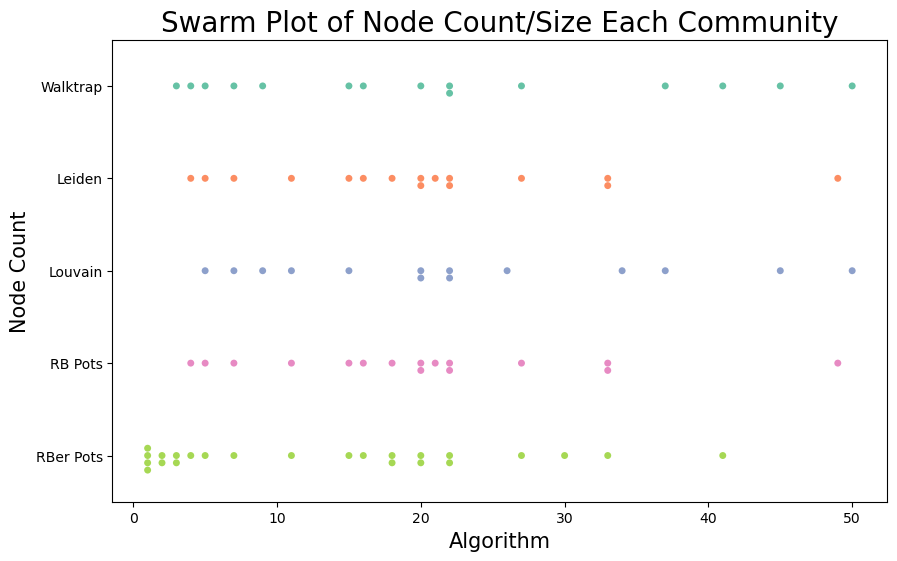

In [95]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Size', y='Algorithm', data=algo_size, palette='Set2')
plt.title('Swarm Plot of Node Count/Size Each Community', fontsize=20)
plt.xlabel('Algorithm', fontsize=15)
plt.ylabel('Node Count', fontsize=15)
plt.show()

### 18.b. Swarm Plot of Edges Size Each Algorithm

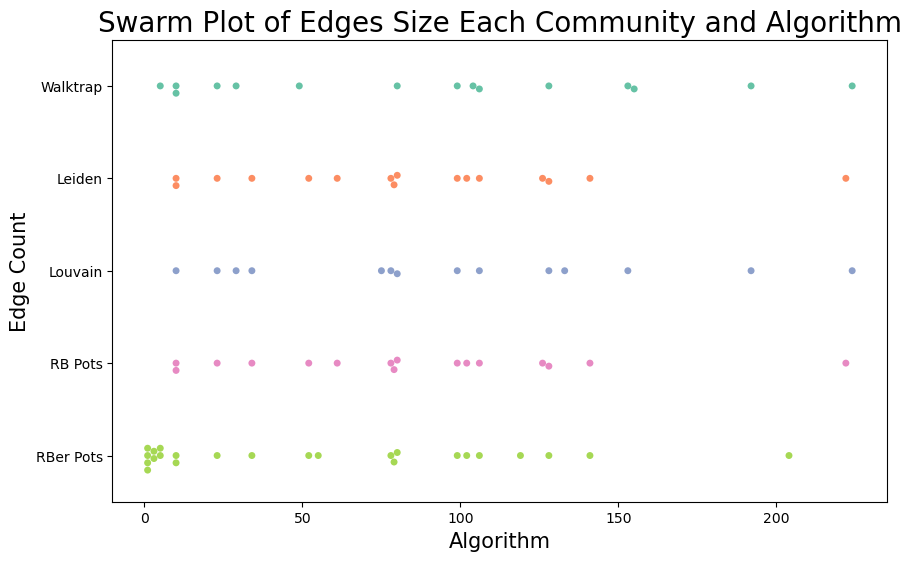

In [96]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Edge', y='Algorithm', data=algo_edge, palette='Set2')
plt.title('Swarm Plot of Edges Size Each Community and Algorithm', fontsize=20)
plt.xlabel('Algorithm', fontsize=15)
plt.ylabel('Edge Count', fontsize=15)
plt.show()

### 18.c. Swarm Plot of Scaled Density Each Algorithm

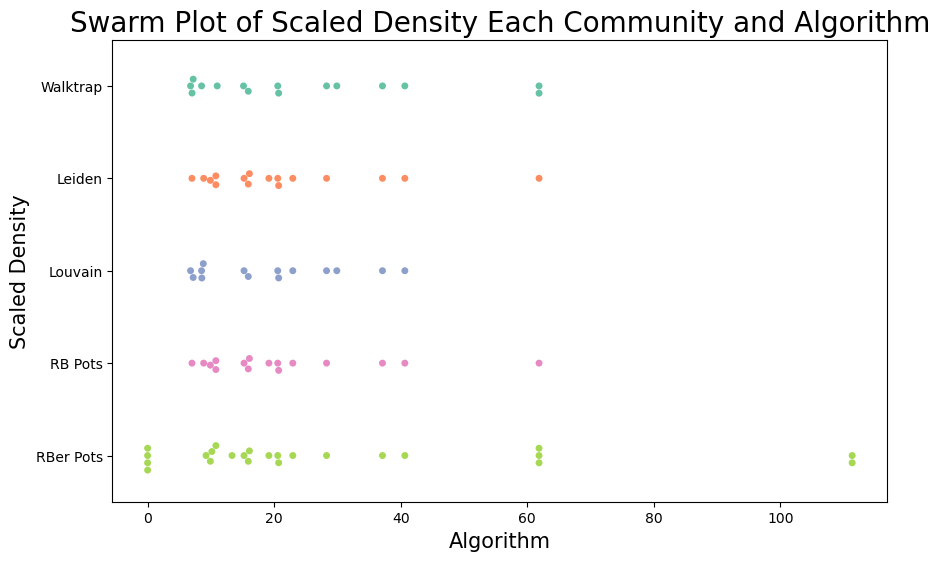

In [97]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='SD', y='Algorithm', data=algo_sd, palette='Set2')
plt.title('Swarm Plot of Scaled Density Each Community and Algorithm', fontsize=20)
plt.xlabel('Algorithm', fontsize=15)
plt.ylabel('Scaled Density', fontsize=15)
plt.show()

### 19.a. Get the Cluster Number from Walktrap Algorithm

In [98]:
wt_com_list = []

wt_community = pd.read_csv("walktrap-communities.csv", header=None)
wt_community

for node in nodes_of_largest_component:
    k = 0
    flag = False
    for index, row in wt_community.iterrows():
        for i in range(len(row)):
            if row[i] == node:
                wt_com_list.append(k)
                flag = True
                break
        if flag == False:
            k = k+1
        else:
            break

print(wt_com_list)

[4, 5, 3, 5, 7, 2, 6, 13, 0, 1, 5, 12, 8, 3, 0, 1, 3, 1, 0, 3, 2, 6, 9, 2, 4, 2, 2, 2, 0, 8, 9, 1, 2, 1, 5, 1, 5, 9, 0, 3, 0, 8, 0, 10, 0, 3, 0, 10, 2, 0, 5, 6, 0, 9, 1, 1, 7, 1, 2, 1, 0, 0, 5, 4, 6, 8, 2, 10, 12, 1, 4, 8, 2, 5, 3, 2, 6, 3, 0, 11, 5, 5, 0, 1, 3, 3, 0, 3, 8, 1, 2, 7, 5, 11, 5, 3, 7, 1, 5, 8, 9, 7, 3, 5, 9, 3, 3, 0, 4, 10, 1, 1, 1, 11, 0, 9, 2, 2, 0, 10, 2, 4, 1, 2, 0, 13, 1, 6, 0, 1, 1, 0, 6, 3, 3, 5, 6, 2, 2, 1, 6, 0, 4, 2, 8, 3, 0, 2, 6, 6, 7, 3, 0, 2, 5, 7, 1, 2, 1, 2, 6, 4, 8, 13, 14, 8, 9, 9, 2, 8, 7, 6, 3, 0, 5, 1, 4, 3, 7, 1, 2, 0, 7, 1, 11, 12, 2, 0, 1, 2, 4, 5, 9, 4, 10, 0, 4, 13, 3, 2, 0, 3, 7, 3, 1, 0, 1, 12, 1, 7, 1, 2, 10, 2, 1, 4, 1, 11, 5, 4, 3, 10, 0, 1, 2, 3, 14, 9, 12, 3, 0, 2, 2, 0, 0, 6, 9, 10, 7, 0, 0, 0, 5, 1, 7, 1, 4, 11, 0, 3, 0, 6, 8, 0, 4, 3, 11, 7, 4, 7, 3, 0, 4, 6, 7, 4, 2, 1, 3, 0, 0, 4, 7, 1, 2, 1, 0, 8, 3, 0, 0, 6, 3, 3, 9, 2, 1, 5, 3, 0, 1, 0, 4, 4, 5, 6, 3, 4, 9, 2, 1, 7, 6, 8, 4, 4, 4, 1, 8, 8, 9, 7, 1, 4, 6, 14, 6, 6, 2, 0, 2, 3, 2]


### 19.b. Get the Cluster Number from RBER Pots Algorithm

In [99]:
rber_com_list = []

rber_community = pd.read_csv("rberpots-communities.csv", header=None)
rber_community

for node in nodes_of_largest_component:
    k = 0
    flag = False
    for index, row in rber_community.iterrows():
        for i in range(len(row)):
            if row[i] == node:
                rber_com_list.append(k)
                flag = True
                break
        if flag == False:
            k = k+1
        else:
            break

print(rber_com_list)

[12, 5, 1, 5, 7, 2, 4, 15, 0, 8, 5, 14, 9, 1, 0, 3, 1, 3, 0, 1, 2, 4, 11, 10, 6, 2, 2, 10, 0, 9, 11, 8, 2, 3, 5, 3, 5, 11, 0, 1, 0, 9, 0, 10, 0, 1, 0, 10, 10, 0, 5, 4, 0, 11, 3, 8, 7, 8, 2, 8, 0, 0, 5, 6, 4, 9, 2, 10, 14, 3, 12, 9, 2, 5, 1, 2, 4, 1, 0, 13, 5, 5, 0, 3, 1, 1, 0, 1, 9, 3, 2, 7, 5, 13, 5, 1, 7, 3, 5, 9, 11, 7, 12, 5, 11, 1, 1, 0, 12, 10, 3, 3, 3, 13, 0, 11, 2, 17, 0, 10, 2, 12, 8, 17, 0, 15, 8, 4, 0, 8, 3, 18, 4, 1, 1, 5, 4, 2, 2, 3, 4, 0, 6, 10, 9, 1, 0, 2, 4, 4, 7, 1, 19, 2, 5, 7, 3, 10, 3, 2, 4, 12, 9, 15, 16, 9, 11, 11, 2, 9, 7, 4, 12, 21, 5, 8, 6, 1, 7, 3, 10, 0, 7, 3, 13, 14, 2, 0, 3, 2, 12, 5, 11, 6, 10, 19, 6, 15, 1, 2, 0, 1, 7, 1, 8, 0, 8, 14, 8, 7, 8, 2, 10, 2, 3, 6, 3, 13, 5, 6, 1, 10, 0, 3, 2, 1, 16, 11, 14, 1, 0, 17, 2, 20, 0, 4, 11, 10, 7, 0, 0, 0, 5, 3, 7, 8, 6, 13, 0, 1, 0, 4, 9, 23, 6, 1, 13, 7, 6, 7, 1, 0, 6, 4, 7, 6, 2, 8, 12, 22, 9, 6, 7, 3, 2, 3, 0, 9, 12, 0, 18, 4, 1, 1, 11, 9, 8, 5, 1, 0, 3, 0, 6, 6, 5, 4, 1, 6, 11, 2, 3, 7, 4, 9, 6, 6, 6, 8, 9, 9, 1

### 19.c. Get the Cluster Number from RB Pots Algorithm

In [100]:
rb_com_list = []

rb_community = pd.read_csv("rbpots-communities.csv", header=None)
rb_community

for node in nodes_of_largest_component:
    k = 0
    flag = False
    for index, row in rb_community.iterrows():
        for i in range(len(row)):
            if row[i] == node:
                rb_com_list.append(k)
                flag = True
                break
        if flag == False:
            k = k+1
        else:
            break

print(rb_com_list)

[12, 4, 1, 4, 7, 2, 5, 15, 0, 9, 4, 14, 6, 1, 0, 3, 1, 3, 0, 1, 2, 5, 11, 10, 8, 2, 2, 10, 0, 6, 11, 9, 2, 3, 4, 3, 4, 11, 0, 1, 0, 6, 0, 10, 0, 1, 0, 10, 10, 0, 4, 5, 0, 11, 3, 9, 7, 9, 2, 9, 0, 0, 4, 8, 5, 6, 2, 10, 14, 3, 12, 6, 2, 4, 1, 2, 5, 1, 0, 13, 4, 4, 0, 3, 1, 1, 0, 1, 6, 3, 2, 7, 4, 13, 4, 1, 7, 3, 4, 6, 11, 7, 12, 4, 11, 1, 1, 0, 12, 10, 3, 3, 3, 13, 0, 11, 2, 2, 0, 10, 2, 12, 9, 2, 0, 15, 9, 5, 0, 9, 3, 0, 5, 1, 1, 4, 5, 2, 2, 3, 5, 0, 8, 10, 6, 1, 0, 2, 5, 5, 7, 1, 0, 2, 4, 7, 3, 10, 3, 2, 5, 12, 6, 15, 6, 6, 11, 11, 2, 6, 7, 5, 12, 0, 4, 9, 8, 1, 7, 3, 10, 0, 7, 3, 13, 14, 2, 0, 3, 2, 12, 4, 11, 8, 10, 0, 8, 15, 1, 2, 0, 1, 7, 1, 9, 0, 9, 14, 9, 7, 9, 2, 10, 2, 3, 8, 3, 13, 4, 8, 1, 10, 0, 3, 2, 1, 6, 11, 14, 1, 0, 2, 2, 0, 0, 5, 11, 10, 7, 0, 0, 0, 4, 3, 7, 9, 8, 13, 0, 1, 0, 5, 6, 0, 8, 1, 13, 7, 8, 7, 1, 0, 8, 5, 7, 8, 2, 9, 12, 0, 6, 8, 7, 3, 2, 3, 0, 6, 12, 0, 0, 5, 1, 1, 11, 6, 9, 4, 1, 0, 3, 0, 8, 8, 4, 5, 1, 8, 11, 2, 3, 7, 5, 6, 8, 8, 8, 9, 6, 6, 11, 7, 9, 12, 

### 19.d. Get the Cluster Number from Louvain Algorithm

In [101]:
lou_com_list = []

lou_community = pd.read_csv("louvain-communities.csv", header=None)
lou_community

for node in nodes_of_largest_component:
    k = 0
    flag = False
    for index, row in lou_community.iterrows():
        for i in range(len(row)):
            if row[i] == node:
                lou_com_list.append(k)
                flag = True
                break
        if flag == False:
            k = k+1
        else:
            break

print(lou_com_list)

[10, 5, 2, 5, 7, 3, 6, 2, 0, 1, 5, 13, 4, 2, 0, 1, 2, 1, 0, 2, 4, 6, 9, 3, 8, 3, 3, 3, 0, 4, 9, 1, 3, 1, 5, 1, 5, 9, 0, 2, 0, 4, 0, 11, 0, 2, 0, 11, 3, 0, 5, 6, 0, 9, 1, 1, 7, 1, 3, 1, 0, 0, 5, 8, 6, 4, 3, 11, 13, 1, 10, 4, 3, 5, 2, 3, 6, 2, 0, 12, 5, 5, 0, 1, 2, 2, 0, 2, 4, 1, 3, 7, 5, 12, 5, 2, 7, 1, 5, 4, 9, 7, 10, 5, 9, 2, 2, 0, 10, 11, 1, 1, 1, 12, 0, 9, 3, 3, 0, 11, 3, 10, 1, 3, 0, 2, 1, 6, 0, 1, 1, 0, 6, 2, 2, 5, 6, 4, 4, 1, 6, 0, 8, 3, 4, 2, 0, 3, 6, 6, 7, 2, 0, 3, 5, 7, 1, 3, 1, 3, 6, 10, 4, 2, 4, 4, 9, 9, 3, 4, 7, 6, 10, 0, 5, 1, 8, 2, 7, 1, 3, 0, 7, 1, 12, 13, 4, 0, 1, 3, 10, 5, 9, 8, 11, 0, 8, 2, 2, 3, 0, 2, 7, 2, 1, 0, 1, 13, 1, 7, 1, 3, 11, 3, 1, 8, 1, 12, 5, 8, 2, 11, 0, 1, 3, 2, 4, 9, 13, 2, 0, 3, 4, 0, 0, 6, 9, 11, 7, 0, 0, 0, 5, 1, 7, 1, 8, 12, 0, 2, 0, 6, 4, 0, 8, 2, 12, 7, 8, 7, 2, 0, 8, 6, 7, 8, 3, 1, 10, 0, 0, 8, 7, 1, 3, 1, 0, 4, 10, 0, 0, 6, 2, 2, 9, 4, 1, 5, 2, 0, 1, 0, 8, 8, 5, 6, 2, 8, 9, 3, 1, 7, 6, 4, 8, 8, 8, 1, 4, 4, 9, 7, 1, 10, 6, 4, 6, 6, 3, 0, 3, 2, 4

### 19.e. Get the Cluster Number from Leiden Algorithm

In [102]:
lei_com_list = []

lei_community = pd.read_csv("leiden-communities.csv", header=None)
lei_community

for node in nodes_of_largest_component:
    k = 0
    flag = False
    for index, row in lei_community.iterrows():
        for i in range(len(row)):
            if row[i] == node:
                lei_com_list.append(k)
                flag = True
                break
        if flag == False:
            k = k+1
        else:
            break

print(lei_com_list)

[12, 4, 1, 4, 7, 2, 5, 15, 0, 9, 4, 14, 6, 1, 0, 3, 1, 3, 0, 1, 2, 5, 11, 10, 8, 2, 2, 10, 0, 6, 11, 9, 2, 3, 4, 3, 4, 11, 0, 1, 0, 6, 0, 10, 0, 1, 0, 10, 10, 0, 4, 5, 0, 11, 3, 9, 7, 9, 2, 9, 0, 0, 4, 8, 5, 6, 2, 10, 14, 3, 12, 6, 2, 4, 1, 2, 5, 1, 0, 13, 4, 4, 0, 3, 1, 1, 0, 1, 6, 3, 2, 7, 4, 13, 4, 1, 7, 3, 4, 6, 11, 7, 12, 4, 11, 1, 1, 0, 12, 10, 3, 3, 3, 13, 0, 11, 2, 2, 0, 10, 2, 12, 9, 2, 0, 15, 9, 5, 0, 9, 3, 0, 5, 1, 1, 4, 5, 2, 2, 3, 5, 0, 8, 10, 6, 1, 0, 2, 5, 5, 7, 1, 0, 2, 4, 7, 3, 10, 3, 2, 5, 12, 6, 15, 6, 6, 11, 11, 2, 6, 7, 5, 12, 0, 4, 9, 8, 1, 7, 3, 10, 0, 7, 3, 13, 14, 2, 0, 3, 2, 12, 4, 11, 8, 10, 0, 8, 15, 1, 2, 0, 1, 7, 1, 9, 0, 9, 14, 9, 7, 9, 2, 10, 2, 3, 8, 3, 13, 4, 8, 1, 10, 0, 3, 2, 1, 6, 11, 14, 1, 0, 2, 2, 0, 0, 5, 11, 10, 7, 0, 0, 0, 4, 3, 7, 9, 8, 13, 0, 1, 0, 5, 6, 0, 8, 1, 13, 7, 8, 7, 1, 0, 8, 5, 7, 8, 2, 9, 12, 0, 6, 8, 7, 3, 2, 3, 0, 6, 12, 0, 0, 5, 1, 1, 11, 6, 9, 4, 1, 0, 3, 0, 8, 8, 4, 5, 1, 8, 11, 2, 3, 7, 5, 6, 8, 8, 8, 9, 6, 6, 11, 7, 9, 12, 

### 20. Create the Similarity Heatmap Between Algorithms' Result

<Axes: >

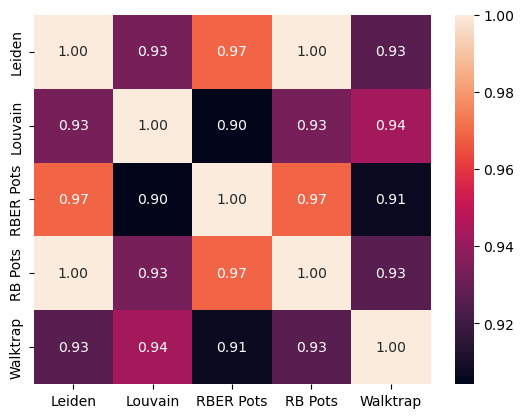

In [103]:
df_eval_sim = pd.DataFrame(np.array([
    [v_measure_score(lei_com_list, lei_com_list), v_measure_score(lei_com_list, lou_com_list), v_measure_score(lei_com_list, rber_com_list), v_measure_score(lei_com_list, rb_com_list), v_measure_score(lei_com_list, wt_com_list)],
    [v_measure_score(lou_com_list, lei_com_list), v_measure_score(lou_com_list, lou_com_list), v_measure_score(lou_com_list, rber_com_list), v_measure_score(lou_com_list, rb_com_list), v_measure_score(lou_com_list, wt_com_list)],
    [v_measure_score(rber_com_list, lei_com_list), v_measure_score(rber_com_list, lou_com_list), v_measure_score(rber_com_list, rber_com_list), v_measure_score(rber_com_list, rb_com_list), v_measure_score(rber_com_list, wt_com_list)],
    [v_measure_score(rb_com_list, lei_com_list), v_measure_score(rb_com_list, lou_com_list), v_measure_score(rb_com_list, rber_com_list), v_measure_score(rb_com_list, rb_com_list), v_measure_score(rb_com_list, wt_com_list)],
    [v_measure_score(wt_com_list, lei_com_list), v_measure_score(wt_com_list, lou_com_list), v_measure_score(wt_com_list, rber_com_list), v_measure_score(wt_com_list, rb_com_list), v_measure_score(wt_com_list, wt_com_list)]
]), columns=["Leiden", "Louvain", "RBER Pots", "RB Pots", "Walktrap"], index = ["Leiden", "Louvain", "RBER Pots", "RB Pots", "Walktrap"])

sns.heatmap(df_eval_sim, annot=True, fmt=".2f")

## === Exploratory or Replication Zone ===

In [104]:
old_data = [[0.548, 0.51, 0.121, 24.106, 1.207],
[0.701, 0.76, 0.14, 59.499, 1.58],
[-0.01, 0, 0, -1964, -0.098],
[0.711, 0.773, 0.135, 70.804, 1.715],
[0.417, 0.491, 0.143, 26.175, 0.844],
[0.707, 0.779, 0.14, 65.678, 1.601],
[0.549, 0.591, 0.136, 34.864, 1.126],
[0.649, 0.723, 0.124, 54.424, 1.587],
[0.703, 0.762, 0.142, 59.117, 1.571],
[0.678, 0.711, 0.132, 61.066, 1.593],
[0, 0.007, 0.144, 6.587, 0],
[0.71, 0.781, 0.134, 73.272, 1.716],
[0.707, 0.757, 0.135, 66.314, 1.683],
[0.711, 0.773, 0.135, 70.804, 1.715],
[0.707, 0.786, 0.14, 68.667, 1.603],
[0.702, 0.79, 0.139, 63.449, 1.597],
[0.711, 0.773, 0.135, 70.804, 1.715],
[0.622, 0.719, 0.118, 5.528, 1.567],
[0.71, 0.781, 0.134, 73.272, 1.716],
[0.697, 0.78, 0.132, 59.834, 1.691],
[0.707, 0.786, 0.14, 68.667, 1.603]]

old_table = pd.DataFrame(old_data, columns=list('abcde'))

scaler = StandardScaler()
pca = PCA(n_components=1)

old_table = scaler.fit_transform(old_table)
model = pca.fit(old_table)
df = model.transform(old_table)
print(df)
print(pca.components_)
print(pca.explained_variance_)

[[ 0.63036584]
 [-0.8501569 ]
 [ 7.72023359]
 [-0.96378273]
 [ 0.98659069]
 [-0.92734612]
 [ 0.32110125]
 [-0.44232859]
 [-0.87742127]
 [-0.60340524]
 [ 3.66887027]
 [-0.96761846]
 [-0.88894562]
 [-0.96378273]
 [-0.94640124]
 [-0.91919019]
 [-0.96378273]
 [-0.22552343]
 [-0.96761846]
 [-0.87345669]
 [-0.94640124]]
[[-0.46840276 -0.46709713 -0.40151169 -0.4294927  -0.46555721]]
[4.31741388]


In [105]:
old_data = [[0.888, 0.721, 0.929, 0.929, 0.929],
[9.125, 8.113, 11.198, 11.198, 11.198],
[0.667, 0.601, 0.838, 0.838, 0.838],
[0.148, 0.3, 0.094, 0.094, 0.094],
[0.008, 0.008, 0.009, 0.009, 0.009],
[101.333, 91.1, 130.571, 130.571, 130.571],
[0.984, 1.04, 1.083, 1.083, 1.083],
[0.27, 0.243, 0.364, 0.364, 0.364],
[0.709, 0.538, 0.603, 0.603, 0.603],
[0.157, 0.308, 0.105, 0.105, 0.105],
[6.333, 5.8, 7.857, 7.857, 7.857],
[0.984, 1.04, 1.083, 1.083, 1.083],
[0.009, 0.208, 0.011, 0.011, 0.011],
[7.437, 5.645, 6.322, 6.322, 6.322],
[16, 14.4, 20.571, 20.571, 20.571],
[0.772, 0.695, 0.971, 0.971, 0.971]]

old_table = pd.DataFrame(old_data, columns=list('abcde'))

scaler = StandardScaler()
pca = PCA(n_components=1)

old_table = scaler.fit_transform(old_table)
model = pca.fit(old_table)
df = model.transform(old_table)
print(df)
print(pca.components_)
print(pca.explained_variance_)

[[-0.7552945 ]
 [-0.0102547 ]
 [-0.76575066]
 [-0.81347135]
 [-0.82570948]
 [ 8.5246021 ]
 [-0.74035117]
 [-0.80079594]
 [-0.77636085]
 [-0.81266833]
 [-0.252832  ]
 [-0.74035117]
 [-0.82149388]
 [-0.30154011]
 [ 0.64844006]
 [-0.75616801]]
[[0.44716949 0.44722784 0.44722355 0.44722355 0.44722355]]
[5.33279792]
